# PAMAP2 Human Activity Recognition Using Machine Learning

## Import Libraries

In [ ]:
# importing libraries
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.signal import find_peaks
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load Data

* Data can be downloaded from the link https://archive.ics.uci.edu/ml/datasets/PAMAP2+Physical+Activity+Monitoring 
* I downloaded and cleaned the data.

In [ ]:
# reading raw data file
filepath = "/content/drive/My Drive/Colab Notebooks/HAR/pamap2_cleaned.csv"
# columns = ['user','activity','timestamp', 'x-axis', 'y-axis', 'z-axis']
har_df = pd.read_csv(filepath)
har_df.head()

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handGyro1,handGyro2,handGyro3,...,ankleAcc16_2,ankleAcc16_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,subject_id,activity
0,37.66,1,100.0,30.375,2.21530,8.27915,5.58753,-0.004750,0.037579,-0.011145,...,-1.84761,0.095156,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,1,lying
1,37.67,1,100.0,30.375,2.29196,7.67288,5.74467,-0.171710,0.025479,-0.009538,...,-1.88438,-0.020804,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656,1,lying
2,37.68,1,100.0,30.375,2.29090,7.14240,5.82342,-0.238241,0.011214,0.000831,...,-1.92203,-0.059173,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119,1,lying
3,37.69,1,100.0,30.375,2.21800,7.14365,5.89930,-0.192912,0.019053,0.013374,...,-1.84714,0.094385,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799,1,lying
4,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,-0.069961,-0.018328,0.004582,...,-1.88582,0.095775,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1,lying


In [ ]:
har_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1942872 entries, 0 to 1942871
Data columns (total 35 columns):
 #   Column            Dtype  
---  ------            -----  
 0   timestamp         float64
 1   activityID        int64  
 2   heartrate         float64
 3   handTemperature   float64
 4   handAcc16_1       float64
 5   handAcc16_2       float64
 6   handAcc16_3       float64
 7   handGyro1         float64
 8   handGyro2         float64
 9   handGyro3         float64
 10  handMagne1        float64
 11  handMagne2        float64
 12  handMagne3        float64
 13  chestTemperature  float64
 14  chestAcc16_1      float64
 15  chestAcc16_2      float64
 16  chestAcc16_3      float64
 17  chestGyro1        float64
 18  chestGyro2        float64
 19  chestGyro3        float64
 20  chestMagne1       float64
 21  chestMagne2       float64
 22  chestMagne3       float64
 23  ankleTemperature  float64
 24  ankleAcc16_1      float64
 25  ankleAcc16_2      float64
 26  ankleAcc16_3  

Only keeping activity sitting, standing, walking, running, ascending_stairs and descending_stairs

In [ ]:
har_df1 = har_df[har_df['activityID'].isin([2,3,4,5,12,13])]
har_df1

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handGyro1,handGyro2,handGyro3,...,ankleAcc16_2,ankleAcc16_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,subject_id,activity
27187,309.53,2,90.0,31.9375,2.124620,9.24108,2.77335,0.037944,0.024816,-0.016013,...,-0.316492,-1.45753,-0.017022,0.013759,0.013117,-83.3840,-37.3229,-55.9643,1,sitting
27188,309.54,2,90.0,31.9375,2.338250,9.27392,2.39156,0.040065,0.011347,0.009483,...,-0.354139,-1.49590,0.001056,-0.008613,0.031861,-83.6082,-37.3150,-55.9624,1,sitting
27189,309.55,2,90.0,31.9375,2.227290,9.23752,2.46700,0.017566,-0.017100,-0.006770,...,-0.316086,-1.53435,0.005429,-0.004029,0.020099,-83.0384,-37.7812,-55.6007,1,sitting
27190,309.56,2,90.0,31.9375,2.190040,9.12433,2.50531,-0.047912,0.007181,0.005693,...,-0.238948,-1.65101,0.002141,-0.024508,-0.004522,-83.4741,-38.5413,-55.3577,1,sitting
27191,309.57,2,90.0,31.9375,2.391820,9.23971,2.85433,-0.046287,-0.000137,0.012163,...,-0.240792,-1.45761,0.028798,-0.016558,-0.007528,-83.8400,-37.1868,-56.7018,1,sitting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1927670,3630.07,5,195.0,30.8125,0.489770,2.82383,9.23639,-0.017195,0.006944,0.007758,...,-0.141213,-3.93367,0.051588,0.002257,0.003737,-17.3185,12.1160,25.8703,8,running
1927671,3630.08,5,195.0,30.8125,0.370253,2.70955,9.08103,-0.032333,-0.044224,0.011758,...,-0.255050,-3.85692,0.081061,-0.009984,0.020242,-17.8209,11.8844,26.1524,8,running
1927672,3630.09,5,195.0,30.8125,0.644139,2.70986,9.35454,-0.004483,-0.001148,0.039415,...,-0.293577,-3.81770,0.044398,-0.009639,0.006757,-18.0830,12.2841,26.2929,8,running
1927673,3630.10,5,185.5,30.8125,0.566153,2.74771,9.27627,-0.022839,0.045628,0.049042,...,-0.103956,-3.93275,0.068296,-0.007361,-0.003399,-17.9482,12.0203,26.4355,8,running


In [ ]:
har_df1.activityID.unique()

array([ 2,  3, 12, 13,  4,  5])

In [ ]:
har_df1['activity'].value_counts()

walking              238761
standing             189931
sitting              185188
ascending_stairs     117216
descending_stairs    104944
running               98199
Name: activity, dtype: int64

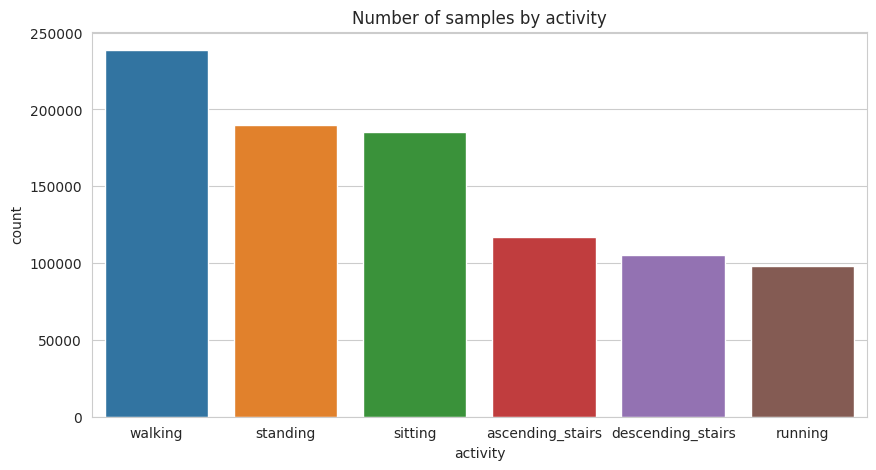

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize = (10, 5))
sns.countplot(x = 'activity', data = har_df1, order = har_df1['activity'].value_counts().index)
plt.title('Number of samples by activity')
plt.show()

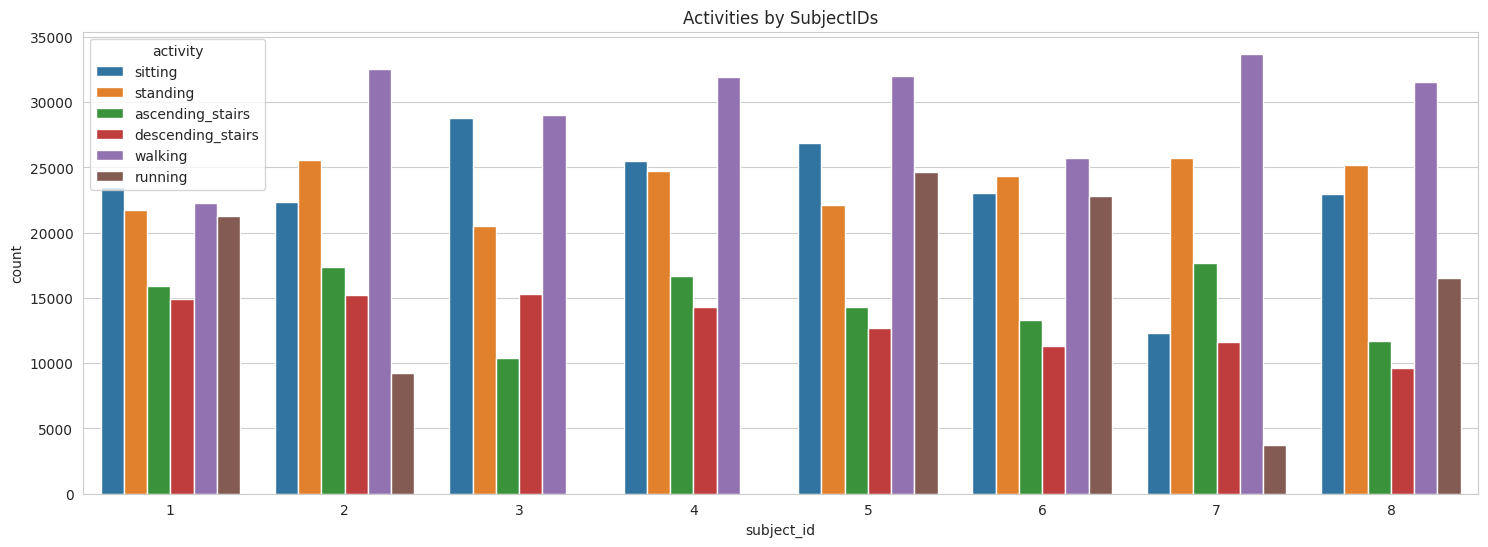

In [ ]:
plt.figure(figsize = (18, 6))
sns.countplot(x = 'subject_id', hue = 'activity', data = har_df1)
plt.title('Activities by SubjectIDs')
plt.show()

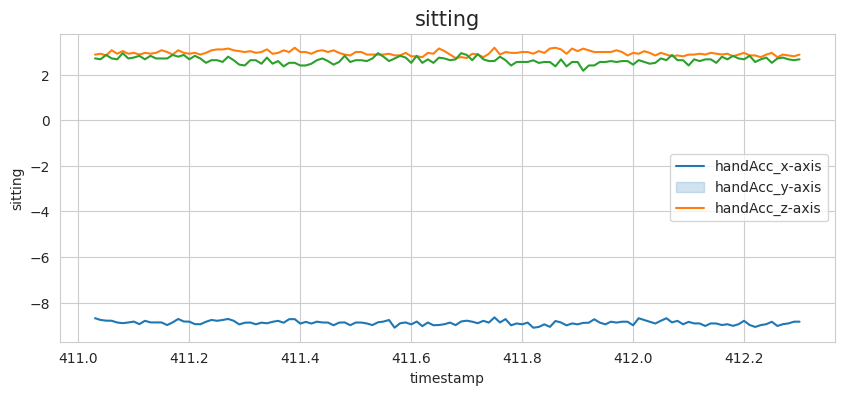

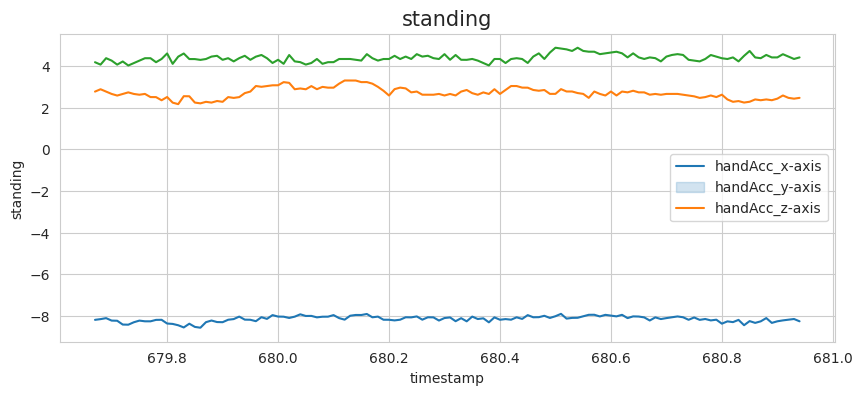

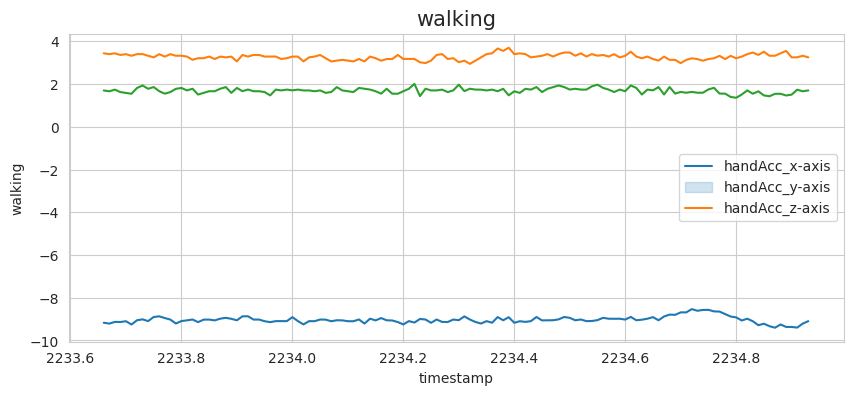

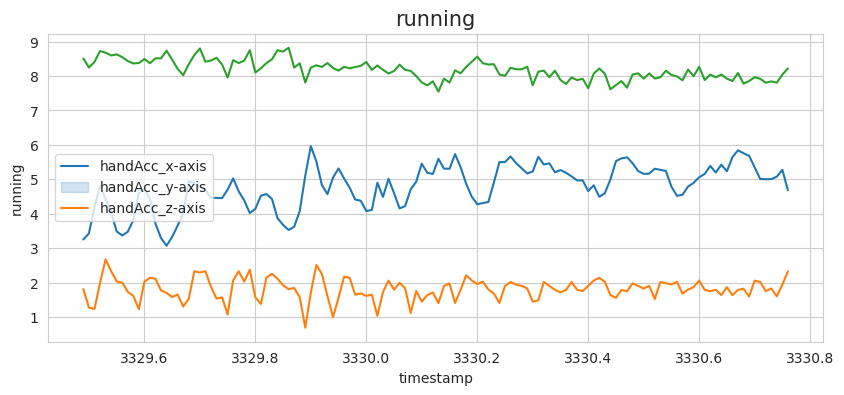

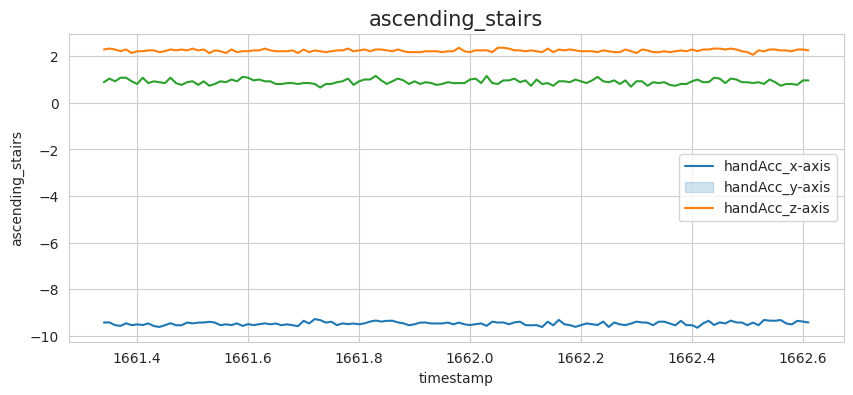

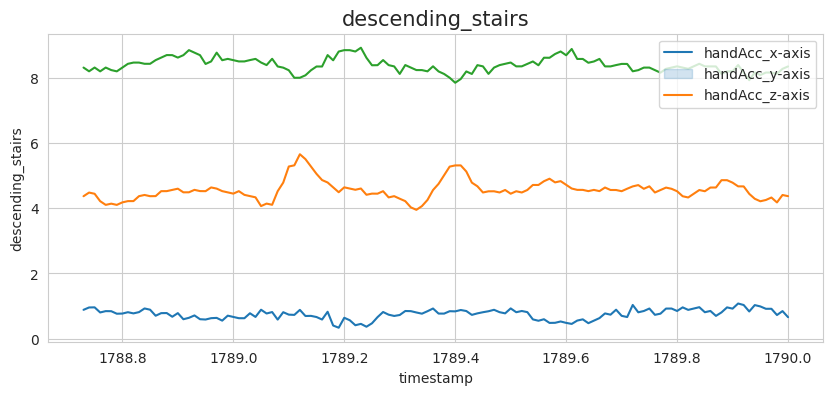

In [ ]:
activities = ['sitting', 'standing', 'walking', 'running', 'ascending_stairs', 'descending_stairs']
for i in activities:
  data_5 = har_df1[(har_df1['subject_id'] == 5) & (har_df1['activity'] == i)][:128]
  plt.figure(figsize = (10, 4))
  sns.lineplot(y = 'handAcc16_1', x = 'timestamp', data = data_5)
  sns.lineplot(y = 'handAcc16_2', x = 'timestamp', data = data_5)
  sns.lineplot(y = 'handAcc16_3', x = 'timestamp', data = data_5)
  plt.legend(['handAcc_x-axis', 'handAcc_y-axis', 'handAcc_z-axis'])
  plt.ylabel(i)
  plt.title(i, fontsize = 15)
  plt.show()

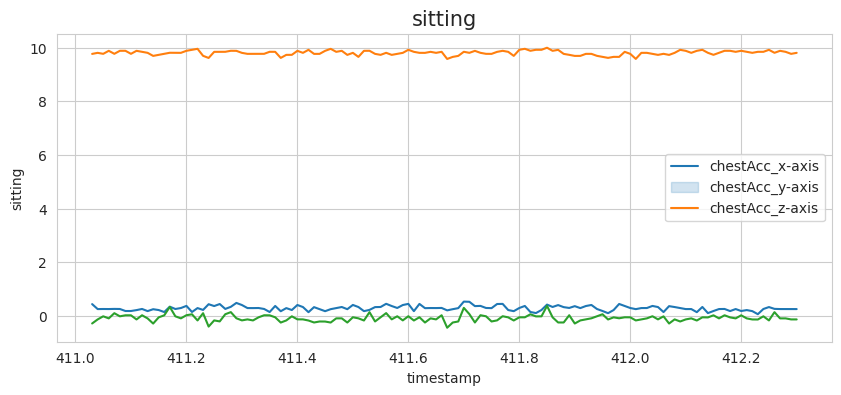

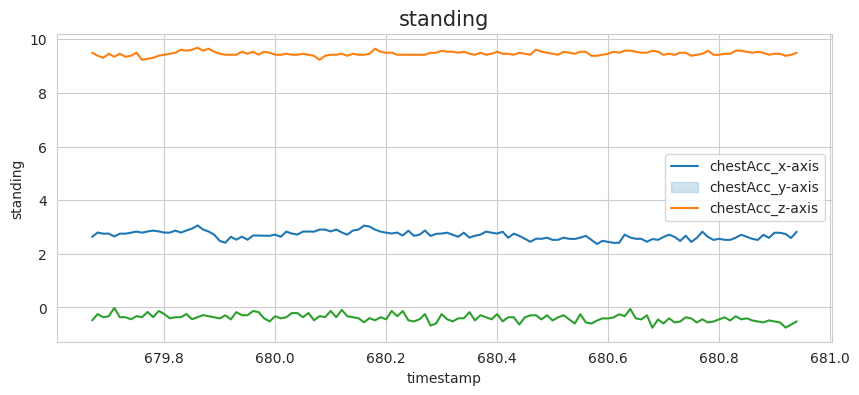

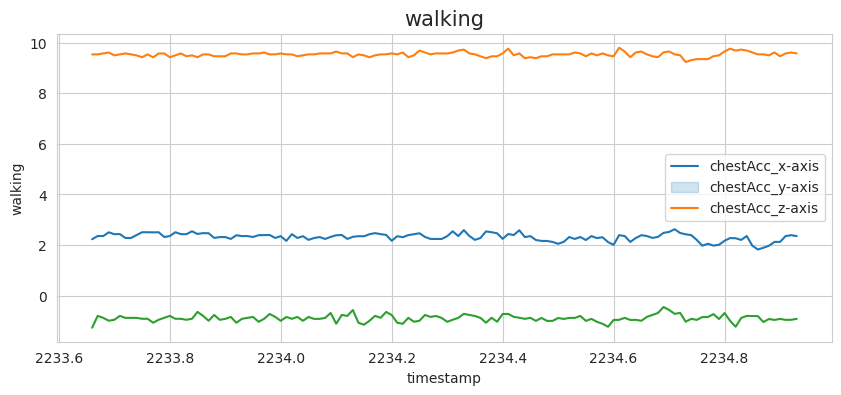

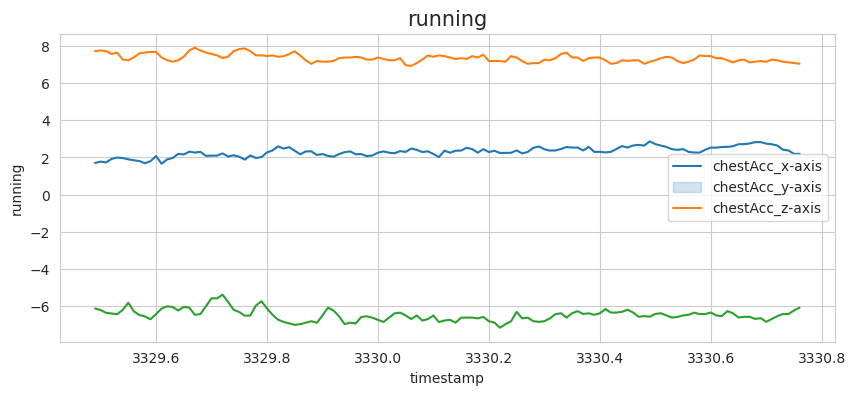

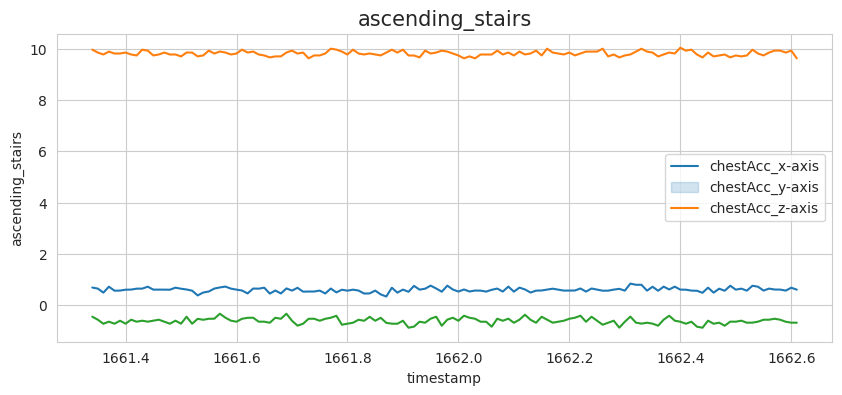

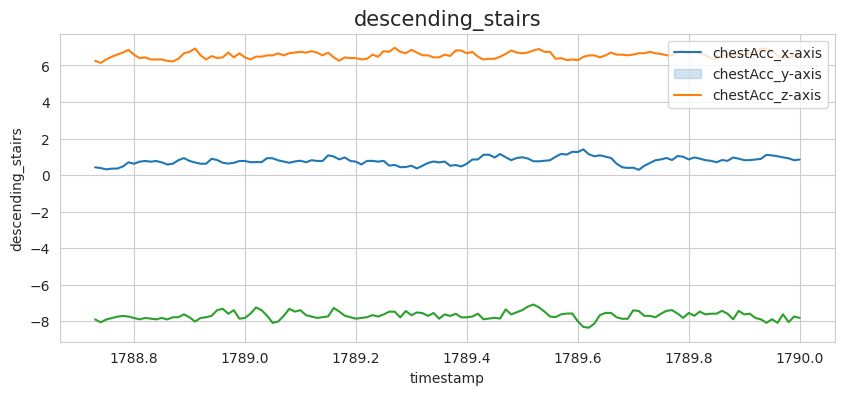

In [ ]:
activities = ['sitting', 'standing', 'walking', 'running', 'ascending_stairs', 'descending_stairs']
for i in activities:
  data_5 = har_df1[(har_df1['subject_id'] == 5) & (har_df1['activity'] == i)][:128]
  plt.figure(figsize = (10, 4))
  sns.lineplot(y = 'chestAcc16_1', x = 'timestamp', data = data_5)
  sns.lineplot(y = 'chestAcc16_2', x = 'timestamp', data = data_5)
  sns.lineplot(y = 'chestAcc16_3', x = 'timestamp', data = data_5)
  plt.legend(['chestAcc_x-axis', 'chestAcc_y-axis', 'chestAcc_z-axis'])
  plt.ylabel(i)
  plt.title(i, fontsize = 15)
  plt.show()

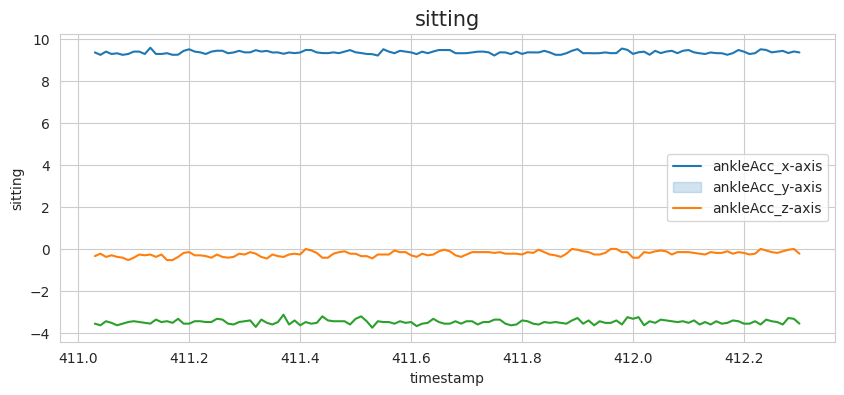

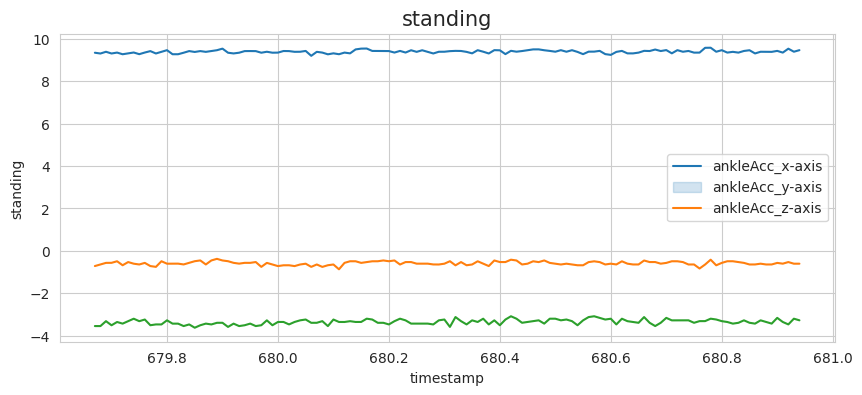

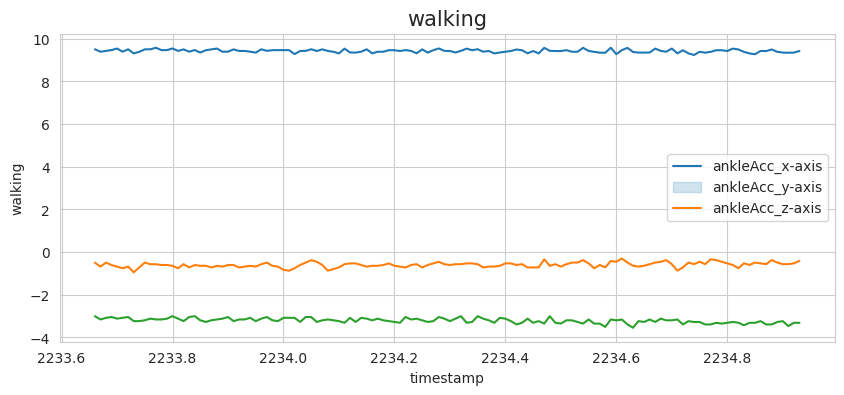

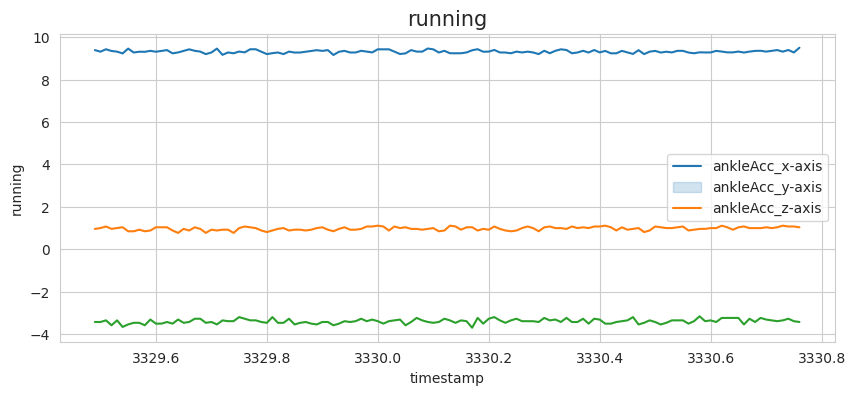

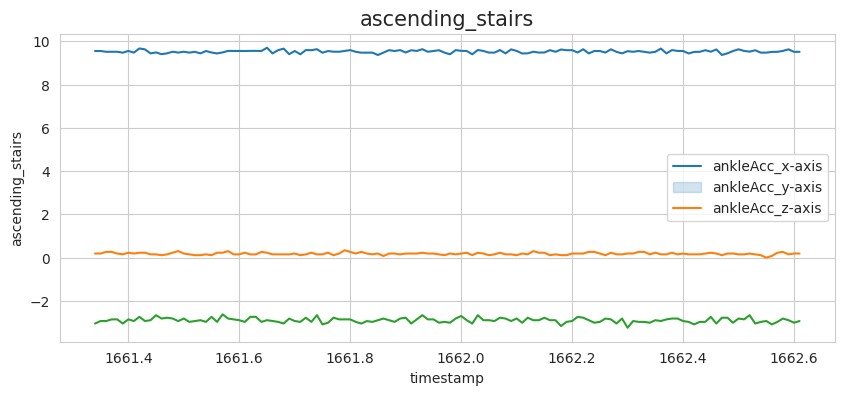

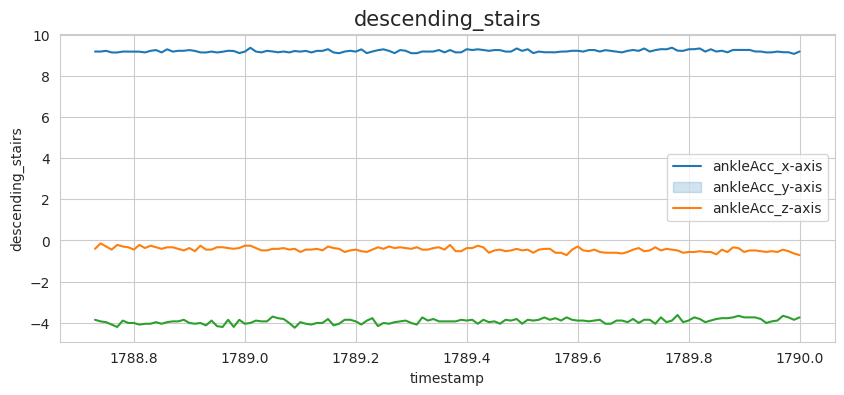

In [ ]:
activities = ['sitting', 'standing', 'walking', 'running', 'ascending_stairs', 'descending_stairs']
for i in activities:
  data_5 = har_df1[(har_df1['subject_id'] == 5) & (har_df1['activity'] == i)][:128]
  plt.figure(figsize = (10, 4))
  sns.lineplot(y = 'ankleAcc16_1', x = 'timestamp', data = data_5)
  sns.lineplot(y = 'ankleAcc16_2', x = 'timestamp', data = data_5)
  sns.lineplot(y = 'ankleAcc16_3', x = 'timestamp', data = data_5)
  plt.legend(['ankleAcc_x-axis', 'ankleAcc_y-axis', 'ankleAcc_z-axis'])
  plt.ylabel(i)
  plt.title(i, fontsize = 15)
  plt.show()

In [ ]:
# train data -> Users upto User ID = 6 (i.e. 5 users)
train_df = har_df1[har_df1['subject_id'] <= 6]
# test data -> Users from User ID = 28 to 36 (i.e. 2 users)
test_df = har_df1[har_df1['subject_id'] > 6]

In [ ]:
train_df.shape

(712044, 35)

In [ ]:
test_df.shape

(222195, 35)

## Feature Extraction

In [ ]:
hand_x_list = []
hand_y_list = []
hand_z_list = []
handGyro_x_list = []
handGyro_y_list = []
handGyro_z_list = []

chest_x_list = []
chest_y_list = []
chest_z_list = []
chestGyro_x_list = []
chestGyro_y_list = []
chestGyro_z_list = []

ankle_x_list = []
ankle_y_list = []
ankle_z_list = []
ankleGyro_x_list = []
ankleGyro_y_list = []
ankleGyro_z_list = []
labels = []

window_size = 100
step_size = 50

# creating overlaping windows of size window-size 100
for i in range(0, har_df1.shape[0] - window_size, step_size):
    xs1 = har_df1['handAcc16_1'].values[i: i + 100]
    ys1 = har_df1['handAcc16_2'].values[i: i + 100]
    zs1 = har_df1['handAcc16_3'].values[i: i + 100]
    xs2 = har_df1['chestAcc16_1'].values[i: i + 100]
    ys2 = har_df1['chestAcc16_2'].values[i: i + 100]
    zs2 = har_df1['chestAcc16_3'].values[i: i + 100]
    xs3 = har_df1['ankleAcc16_1'].values[i: i + 100]
    ys3 = har_df1['ankleAcc16_2'].values[i: i + 100]
    zs3 = har_df1['ankleAcc16_3'].values[i: i + 100]
    gyro_xs1 = har_df1['handGyro1'].values[i: i + 100]
    gyro_ys1 = har_df1['handGyro2'].values[i: i + 100]
    gyro_zs1 = har_df1['handGyro3'].values[i: i + 100]
    gyro_xs2 = har_df1['chestGyro1'].values[i: i + 100]
    gyro_ys2 = har_df1['chestGyro2'].values[i: i + 100]
    gyro_zs2 = har_df1['chestGyro3'].values[i: i + 100]
    gyro_xs3 = har_df1['ankleGyro1'].values[i: i + 100]
    gyro_ys3 = har_df1['ankleGyro2'].values[i: i + 100]
    gyro_zs3 = har_df1['ankleGyro3'].values[i: i + 100]
    label = stats.mode(har_df1['activity'][i: i + 100])[0][0]

    hand_x_list.append(xs1)
    hand_y_list.append(ys1)
    hand_z_list.append(zs1)
    chest_x_list.append(xs2)
    chest_y_list.append(ys2)
    chest_z_list.append(zs2)
    ankle_x_list.append(xs3)
    ankle_y_list.append(ys3)
    ankle_z_list.append(zs3)
    handGyro_x_list.append(gyro_xs1)
    handGyro_y_list.append(gyro_ys1)
    handGyro_z_list.append(gyro_zs1)
    chestGyro_x_list.append(gyro_xs2)
    chestGyro_y_list.append(gyro_ys2)
    chestGyro_z_list.append(gyro_zs2)
    ankleGyro_x_list.append(gyro_xs3)
    ankleGyro_y_list.append(gyro_ys3)
    ankleGyro_z_list.append(gyro_zs3)
    labels.append(label)

# Statistical Features on raw x, y and z in time domain
features = pd.DataFrame()

# mean
features['handAcc_x_mean'] = pd.Series(hand_x_list).apply(lambda x: x.mean())
features['handAcc_y_mean'] = pd.Series(hand_y_list).apply(lambda x: x.mean())
features['handAcc_z_mean'] = pd.Series(hand_z_list).apply(lambda x: x.mean())
features['chestAcc_x_mean'] = pd.Series(chest_x_list).apply(lambda x: x.mean())
features['chestAcc_y_mean'] = pd.Series(chest_y_list).apply(lambda x: x.mean())
features['chestAcc_z_mean'] = pd.Series(chest_z_list).apply(lambda x: x.mean())
features['ankleAcc_x_mean'] = pd.Series(ankle_x_list).apply(lambda x: x.mean())
features['ankleAcc_y_mean'] = pd.Series(ankle_y_list).apply(lambda x: x.mean())
features['ankleAcc_z_mean'] = pd.Series(ankle_z_list).apply(lambda x: x.mean())
features['handGyro_x_mean'] = pd.Series(handGyro_x_list).apply(lambda x: x.mean())
features['handGyro_y_mean'] = pd.Series(handGyro_y_list).apply(lambda x: x.mean())
features['handGyro_z_mean'] = pd.Series(handGyro_z_list).apply(lambda x: x.mean())
features['chestGyro_x_mean'] = pd.Series(chestGyro_x_list).apply(lambda x: x.mean())
features['chestGyro_y_mean'] = pd.Series(chestGyro_y_list).apply(lambda x: x.mean())
features['chestGyro_z_mean'] = pd.Series(chestGyro_z_list).apply(lambda x: x.mean())
features['ankleGyro_x_mean'] = pd.Series(ankleGyro_x_list).apply(lambda x: x.mean())
features['ankleGyro_y_mean'] = pd.Series(ankleGyro_y_list).apply(lambda x: x.mean())
features['ankleGyro_z_mean'] = pd.Series(ankleGyro_z_list).apply(lambda x: x.mean())

# std dev
features['handAcc_x_std'] = pd.Series(hand_x_list).apply(lambda x: x.std())
features['handAcc_y_std'] = pd.Series(hand_y_list).apply(lambda x: x.std())
features['handAcc_z_std'] = pd.Series(hand_z_list).apply(lambda x: x.std())
features['chestAcc_x_std'] = pd.Series(chest_x_list).apply(lambda x: x.std())
features['chestAcc_y_std'] = pd.Series(chest_y_list).apply(lambda x: x.std())
features['chestAcc_z_std'] = pd.Series(chest_z_list).apply(lambda x: x.std())
features['ankleAcc_x_std'] = pd.Series(ankle_x_list).apply(lambda x: x.std())
features['ankleAcc_y_std'] = pd.Series(ankle_y_list).apply(lambda x: x.std())
features['ankleAcc_z_std'] = pd.Series(ankle_z_list).apply(lambda x: x.std())
features['handGyro_x_std'] = pd.Series(handGyro_x_list).apply(lambda x: x.std())
features['handGyro_y_std'] = pd.Series(handGyro_y_list).apply(lambda x: x.std())
features['handGyro_z_std'] = pd.Series(handGyro_z_list).apply(lambda x: x.std())
features['chestGyro_x_std'] = pd.Series(chestGyro_x_list).apply(lambda x: x.std())
features['chestGyro_y_std'] = pd.Series(chestGyro_y_list).apply(lambda x: x.std())
features['chestGyro_z_std'] = pd.Series(chestGyro_z_list).apply(lambda x: x.std())
features['ankleGyro_x_std'] = pd.Series(ankleGyro_x_list).apply(lambda x: x.std())
features['ankleGyro_y_std'] = pd.Series(ankleGyro_y_list).apply(lambda x: x.std())
features['ankleGyro_z_std'] = pd.Series(ankleGyro_z_list).apply(lambda x: x.std())

# avg absolute diff
features['handAcc_x_aad'] = pd.Series(hand_x_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
features['handAcc_y_aad'] = pd.Series(hand_y_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
features['handAcc_z_aad'] = pd.Series(hand_z_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
features['chestAcc_x_aad'] = pd.Series(chest_x_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
features['chestAcc_y_aad'] = pd.Series(chest_y_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
features['chestAcc_z_aad'] = pd.Series(chest_z_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
features['ankleAcc_x_aad'] = pd.Series(ankle_x_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
features['ankleAcc_y_aad'] = pd.Series(ankle_y_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
features['ankleAcc_z_aad'] = pd.Series(ankle_z_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
features['handGyro_x_aad'] = pd.Series(handGyro_x_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
features['handGyro_y_aad'] = pd.Series(handGyro_y_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
features['handGyro_z_aad'] = pd.Series(handGyro_z_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
features['chestGyro_x_aad'] = pd.Series(chestGyro_x_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
features['chestGyro_y_aad'] = pd.Series(chestGyro_y_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
features['chestGyro_z_aad'] = pd.Series(chestGyro_z_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
features['ankleGyro_x_aad'] = pd.Series(ankleGyro_x_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
features['ankleGyro_y_aad'] = pd.Series(ankleGyro_y_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
features['ankleGyro_z_aad'] = pd.Series(ankleGyro_z_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# min
features['handAcc_x_min'] = pd.Series(hand_x_list).apply(lambda x: x.min())
features['handAcc_y_min'] = pd.Series(hand_y_list).apply(lambda x: x.min())
features['handAcc_z_min'] = pd.Series(hand_z_list).apply(lambda x: x.min())
features['chestAcc_x_min'] = pd.Series(chest_x_list).apply(lambda x: x.min())
features['chestAcc_y_min'] = pd.Series(chest_y_list).apply(lambda x: x.min())
features['chestAcc_z_min'] = pd.Series(chest_z_list).apply(lambda x: x.min())
features['ankleAcc_x_min'] = pd.Series(ankle_x_list).apply(lambda x: x.min())
features['ankleAcc_y_min'] = pd.Series(ankle_y_list).apply(lambda x: x.min())
features['ankleAcc_z_min'] = pd.Series(ankle_z_list).apply(lambda x: x.min())
features['handGyro_x_min'] = pd.Series(handGyro_x_list).apply(lambda x: x.min())
features['handGyro_y_min'] = pd.Series(handGyro_y_list).apply(lambda x: x.min())
features['handGyro_z_min'] = pd.Series(handGyro_z_list).apply(lambda x: x.min())
features['chestGyro_x_min'] = pd.Series(chestGyro_x_list).apply(lambda x: x.min())
features['chestGyro_y_min'] = pd.Series(chestGyro_y_list).apply(lambda x: x.min())
features['chestGyro_z_min'] = pd.Series(chestGyro_z_list).apply(lambda x: x.min())
features['ankleGyro_x_min'] = pd.Series(ankleGyro_x_list).apply(lambda x: x.min())
features['ankleGyro_y_min'] = pd.Series(ankleGyro_y_list).apply(lambda x: x.min())
features['ankleGyro_z_min'] = pd.Series(ankleGyro_z_list).apply(lambda x: x.min())

# max
features['handAcc_x_max'] = pd.Series(hand_x_list).apply(lambda x: x.max())
features['handAcc_y_max'] = pd.Series(hand_y_list).apply(lambda x: x.max())
features['handAcc_z_max'] = pd.Series(hand_z_list).apply(lambda x: x.max())
features['chestAcc_x_max'] = pd.Series(chest_x_list).apply(lambda x: x.max())
features['chestAcc_y_max'] = pd.Series(chest_y_list).apply(lambda x: x.max())
features['chestAcc_z_max'] = pd.Series(chest_z_list).apply(lambda x: x.max())
features['ankleAcc_x_max'] = pd.Series(ankle_x_list).apply(lambda x: x.max())
features['ankleAcc_y_max'] = pd.Series(ankle_y_list).apply(lambda x: x.max())
features['ankleAcc_z_max'] = pd.Series(ankle_z_list).apply(lambda x: x.max())
features['handGyro_x_max'] = pd.Series(handGyro_x_list).apply(lambda x: x.max())
features['handGyro_y_max'] = pd.Series(handGyro_y_list).apply(lambda x: x.max())
features['handGyro_z_max'] = pd.Series(handGyro_z_list).apply(lambda x: x.max())
features['chestGyro_x_max'] = pd.Series(chestGyro_x_list).apply(lambda x: x.max())
features['chestGyro_y_max'] = pd.Series(chestGyro_y_list).apply(lambda x: x.max())
features['chestGyro_z_max'] = pd.Series(chestGyro_z_list).apply(lambda x: x.max())
features['ankleGyro_x_max'] = pd.Series(ankleGyro_x_list).apply(lambda x: x.max())
features['ankleGyro_y_max'] = pd.Series(ankleGyro_y_list).apply(lambda x: x.max())
features['ankleGyro_z_max'] = pd.Series(ankleGyro_z_list).apply(lambda x: x.max())

# max-min diff
features['handAcc_x_maxmin_diff'] = features['handAcc_x_max'] - features['handAcc_x_min']
features['handAcc_y_maxmin_diff'] = features['handAcc_y_max'] - features['handAcc_y_min']
features['handAcc_z_maxmin_diff'] = features['handAcc_z_max'] - features['handAcc_z_min']
features['chestAcc_x_maxmin_diff'] = features['chestAcc_x_max'] - features['chestAcc_x_min']
features['chestAcc_y_maxmin_diff'] = features['chestAcc_y_max'] - features['chestAcc_y_min']
features['chestAcc_z_maxmin_diff'] = features['chestAcc_z_max'] - features['chestAcc_z_min']
features['ankleAcc_x_maxmin_diff'] = features['ankleAcc_x_max'] - features['ankleAcc_x_min']
features['ankleAcc_y_maxmin_diff'] = features['ankleAcc_y_max'] - features['ankleAcc_y_min']
features['ankleAcc_z_maxmin_diff'] = features['ankleAcc_z_max'] - features['ankleAcc_z_min']
features['handGyro_x_maxmin_diff'] = features['handGyro_x_max'] - features['handGyro_x_min']
features['handGyro_y_maxmin_diff'] = features['handGyro_y_max'] - features['handGyro_y_min']
features['handGyro_z_maxmin_diff'] = features['handGyro_z_max'] - features['handGyro_z_min']
features['chestGyro_x_maxmin_diff'] = features['chestGyro_x_max'] - features['chestGyro_x_min']
features['chestGyro_y_maxmin_diff'] = features['chestGyro_y_max'] - features['chestGyro_y_min']
features['chestGyro_z_maxmin_diff'] = features['chestGyro_z_max'] - features['chestGyro_z_min']
features['ankleGyro_x_maxmin_diff'] = features['ankleGyro_x_max'] - features['ankleGyro_x_min']
features['ankleGyro_y_maxmin_diff'] = features['ankleGyro_y_max'] - features['ankleGyro_y_min']
features['ankleGyro_z_maxmin_diff'] = features['ankleGyro_z_max'] - features['ankleGyro_z_min']

# median
features['handAcc_x_median'] = pd.Series(hand_x_list).apply(lambda x: np.median(x))
features['handAcc_y_median'] = pd.Series(hand_y_list).apply(lambda x: np.median(x))
features['handAcc_z_median'] = pd.Series(hand_z_list).apply(lambda x: np.median(x))
features['chestAcc_x_median'] = pd.Series(chest_x_list).apply(lambda x: np.median(x))
features['chestAcc_y_median'] = pd.Series(chest_y_list).apply(lambda x: np.median(x))
features['chestAcc_z_median'] = pd.Series(chest_z_list).apply(lambda x: np.median(x))
features['ankleAcc_x_median'] = pd.Series(ankle_x_list).apply(lambda x: np.median(x))
features['ankleAcc_y_median'] = pd.Series(ankle_y_list).apply(lambda x: np.median(x))
features['ankleAcc_z_median'] = pd.Series(ankle_z_list).apply(lambda x: np.median(x))
features['handGyro_x_median'] = pd.Series(handGyro_x_list).apply(lambda x: np.median(x))
features['handGyro_y_median'] = pd.Series(handGyro_y_list).apply(lambda x: np.median(x))
features['handGyro_z_median'] = pd.Series(handGyro_z_list).apply(lambda x: np.median(x))
features['chestGyro_x_median'] = pd.Series(chestGyro_x_list).apply(lambda x: np.median(x))
features['chestGyro_y_median'] = pd.Series(chestGyro_y_list).apply(lambda x: np.median(x))
features['chestGyro_z_median'] = pd.Series(chestGyro_z_list).apply(lambda x: np.median(x))
features['ankleGyro_x_median'] = pd.Series(ankleGyro_x_list).apply(lambda x: np.median(x))
features['ankleGyro_y_median'] = pd.Series(ankleGyro_y_list).apply(lambda x: np.median(x))
features['ankleGyro_z_median'] = pd.Series(ankleGyro_z_list).apply(lambda x: np.median(x))

# median abs dev 
features['handAcc_x_mad'] = pd.Series(hand_x_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
features['handAcc_y_mad'] = pd.Series(hand_y_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
features['handAcc_z_mad'] = pd.Series(hand_z_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
features['chestAcc_x_mad'] = pd.Series(chest_x_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
features['chestAcc_y_mad'] = pd.Series(chest_y_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
features['chestAcc_z_mad'] = pd.Series(chest_z_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
features['ankleAcc_x_mad'] = pd.Series(ankle_x_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
features['ankleAcc_y_mad'] = pd.Series(ankle_y_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
features['ankleAcc_z_mad'] = pd.Series(ankle_z_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
features['handGyro_x_mad'] = pd.Series(handGyro_x_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
features['handGyro_y_mad'] = pd.Series(handGyro_y_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
features['handGyro_z_mad'] = pd.Series(handGyro_z_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
features['chestGyro_x_mad'] = pd.Series(chestGyro_x_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
features['chestGyro_y_mad'] = pd.Series(chestGyro_y_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
features['chestGyro_z_mad'] = pd.Series(chestGyro_z_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
features['ankleGyro_x_mad'] = pd.Series(ankleGyro_x_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
features['ankleGyro_y_mad'] = pd.Series(ankleGyro_y_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
features['ankleGyro_z_mad'] = pd.Series(ankleGyro_z_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# interquartile range
features['handAcc_x_IQR'] = pd.Series(hand_x_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
features['handAcc_y_IQR'] = pd.Series(hand_y_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
features['handAcc_z_IQR'] = pd.Series(hand_z_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
features['chestAcc_x_IQR'] = pd.Series(chest_x_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
features['chestAcc_y_IQR'] = pd.Series(chest_y_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
features['chestAcc_z_IQR'] = pd.Series(chest_z_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
features['ankleAcc_x_IQR'] = pd.Series(ankle_x_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
features['ankleAcc_y_IQR'] = pd.Series(ankle_y_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
features['ankleAcc_z_IQR'] = pd.Series(ankle_z_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
features['handGyro_x_IQR'] = pd.Series(handGyro_x_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
features['handGyro_y_IQR'] = pd.Series(handGyro_y_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
features['handGyro_z_IQR'] = pd.Series(handGyro_z_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
features['chestGyro_x_IQR'] = pd.Series(chestGyro_x_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
features['chestGyro_y_IQR'] = pd.Series(chestGyro_y_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
features['chestGyro_z_IQR'] = pd.Series(chestGyro_z_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
features['ankleGyro_x_IQR'] = pd.Series(ankleGyro_x_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
features['ankleGyro_y_IQR'] = pd.Series(ankleGyro_y_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
features['ankleGyro_z_IQR'] = pd.Series(ankleGyro_z_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# # negtive count
# features['handAcc_x_neg_count'] = pd.Series(hand_x_list).apply(lambda x: np.sum(x < 0))
# features['handAcc_y_neg_count'] = pd.Series(hand_y_list).apply(lambda x: np.sum(x < 0))
# features['handAcc_z_neg_count'] = pd.Series(hand_z_list).apply(lambda x: np.sum(x < 0))

# # positive count
# features['handAcc_x_pos_count'] = pd.Series(hand_x_list).apply(lambda x: np.sum(x > 0))
# features['handAcc_y_pos_count'] = pd.Series(hand_y_list).apply(lambda x: np.sum(x > 0))
# features['handAcc_z_pos_count'] = pd.Series(hand_z_list).apply(lambda x: np.sum(x > 0))

# # values above mean
# features['handAcc_x_above_mean'] = pd.Series(hand_x_list).apply(lambda x: np.sum(x > x.mean()))
# features['handAcc_y_above_mean'] = pd.Series(hand_y_list).apply(lambda x: np.sum(x > x.mean()))
# features['handAcc_z_above_mean'] = pd.Series(hand_z_list).apply(lambda x: np.sum(x > x.mean()))

# # number of peaks
# features['hand_x_peak_count'] = pd.Series(hand_x_list).apply(lambda x: len(find_peaks(x)[0]))
# features['hand_y_peak_count'] = pd.Series(hand_y_list).apply(lambda x: len(find_peaks(x)[0]))
# features['hand_z_peak_count'] = pd.Series(hand_z_list).apply(lambda x: len(find_peaks(x)[0]))

# skewness
features['handAcc_x_skewness'] = pd.Series(hand_x_list).apply(lambda x: stats.skew(x))
features['handAcc_y_skewness'] = pd.Series(hand_y_list).apply(lambda x: stats.skew(x))
features['handAcc_z_skewness'] = pd.Series(hand_z_list).apply(lambda x: stats.skew(x))
features['chestAcc_x_skewness'] = pd.Series(chest_x_list).apply(lambda x: stats.skew(x))
features['chestAcc_y_skewness'] = pd.Series(chest_y_list).apply(lambda x: stats.skew(x))
features['chestAcc_z_skewness'] = pd.Series(chest_z_list).apply(lambda x: stats.skew(x))
features['ankleAcc_x_skewness'] = pd.Series(ankle_x_list).apply(lambda x: stats.skew(x))
features['ankleAcc_y_skewness'] = pd.Series(ankle_y_list).apply(lambda x: stats.skew(x))
features['ankleAcc_z_skewness'] = pd.Series(ankle_z_list).apply(lambda x: stats.skew(x))
features['handGyro_x_skewness'] = pd.Series(handGyro_x_list).apply(lambda x: stats.skew(x))
features['handGyro_y_skewness'] = pd.Series(handGyro_y_list).apply(lambda x: stats.skew(x))
features['handGyro_z_skewness'] = pd.Series(handGyro_z_list).apply(lambda x: stats.skew(x))
features['chestGyro_x_skewness'] = pd.Series(chestGyro_x_list).apply(lambda x: stats.skew(x))
features['chestGyro_y_skewness'] = pd.Series(chestGyro_y_list).apply(lambda x: stats.skew(x))
features['chestGyro_z_skewness'] = pd.Series(chestGyro_z_list).apply(lambda x: stats.skew(x))
features['ankleGyro_x_skewness'] = pd.Series(ankleGyro_x_list).apply(lambda x: stats.skew(x))
features['ankleGyro_y_skewness'] = pd.Series(ankleGyro_y_list).apply(lambda x: stats.skew(x))
features['ankleGyro_z_skewness'] = pd.Series(ankleGyro_z_list).apply(lambda x: stats.skew(x))

# kurtosis
features['handAcc_x_kurtosis'] = pd.Series(hand_x_list).apply(lambda x: stats.kurtosis(x))
features['handAcc_y_kurtosis'] = pd.Series(hand_y_list).apply(lambda x: stats.kurtosis(x))
features['handAcc_z_kurtosis'] = pd.Series(hand_z_list).apply(lambda x: stats.kurtosis(x))
features['chestAcc_x_kurtosis'] = pd.Series(chest_x_list).apply(lambda x: stats.kurtosis(x))
features['chestAcc_y_kurtosis'] = pd.Series(chest_y_list).apply(lambda x: stats.kurtosis(x))
features['chestAcc_z_kurtosis'] = pd.Series(chest_z_list).apply(lambda x: stats.kurtosis(x))
features['ankleAcc_x_kurtosis'] = pd.Series(ankle_x_list).apply(lambda x: stats.kurtosis(x))
features['ankleAcc_y_kurtosis'] = pd.Series(ankle_y_list).apply(lambda x: stats.kurtosis(x))
features['ankleAcc_z_kurtosis'] = pd.Series(ankle_z_list).apply(lambda x: stats.kurtosis(x))
features['handGyro_x_kurtosis'] = pd.Series(handGyro_x_list).apply(lambda x: stats.kurtosis(x))
features['handGyro_y_kurtosis'] = pd.Series(handGyro_y_list).apply(lambda x: stats.kurtosis(x))
features['handGyro_z_kurtosis'] = pd.Series(handGyro_z_list).apply(lambda x: stats.kurtosis(x))
features['chestGyro_x_kurtosis'] = pd.Series(chestGyro_x_list).apply(lambda x: stats.kurtosis(x))
features['chestGyro_y_kurtosis'] = pd.Series(chestGyro_y_list).apply(lambda x: stats.kurtosis(x))
features['chestGyro_z_kurtosis'] = pd.Series(chestGyro_z_list).apply(lambda x: stats.kurtosis(x))
features['ankleGyro_x_kurtosis'] = pd.Series(ankleGyro_x_list).apply(lambda x: stats.kurtosis(x))
features['ankleGyro_y_kurtosis'] = pd.Series(ankleGyro_y_list).apply(lambda x: stats.kurtosis(x))
features['ankleGyro_z_kurtosis'] = pd.Series(ankleGyro_z_list).apply(lambda x: stats.kurtosis(x))

# energy
features['handAcc_x_energy'] = pd.Series(hand_x_list).apply(lambda x: np.sum(x**2)/100)
features['handAcc_y_energy'] = pd.Series(hand_y_list).apply(lambda x: np.sum(x**2)/100)
features['handAcc_z_energy'] = pd.Series(hand_z_list).apply(lambda x: np.sum(x**2/100))
features['chestAcc_x_energy'] = pd.Series(chest_x_list).apply(lambda x: np.sum(x**2)/100)
features['chestAcc_y_energy'] = pd.Series(chest_y_list).apply(lambda x: np.sum(x**2)/100)
features['chestAcc_z_energy'] = pd.Series(chest_z_list).apply(lambda x: np.sum(x**2/100))
features['ankleAcc_x_energy'] = pd.Series(ankle_x_list).apply(lambda x: np.sum(x**2)/100)
features['ankleAcc_y_energy'] = pd.Series(ankle_y_list).apply(lambda x: np.sum(x**2)/100)
features['ankleAcc_z_energy'] = pd.Series(ankle_z_list).apply(lambda x: np.sum(x**2/100))
features['handGyro_x_energy'] = pd.Series(handGyro_x_list).apply(lambda x: np.sum(x**2)/100)
features['handGyro_y_energy'] = pd.Series(handGyro_y_list).apply(lambda x: np.sum(x**2)/100)
features['handGyro_z_energy'] = pd.Series(handGyro_z_list).apply(lambda x: np.sum(x**2/100))
features['chestGyro_x_energy'] = pd.Series(chestGyro_x_list).apply(lambda x: np.sum(x**2)/100)
features['chestGyro_y_energy'] = pd.Series(chestGyro_y_list).apply(lambda x: np.sum(x**2)/100)
features['chestGyro_z_energy'] = pd.Series(chestGyro_z_list).apply(lambda x: np.sum(x**2/100))
features['ankleGyro_x_energy'] = pd.Series(ankleGyro_x_list).apply(lambda x: np.sum(x**2)/100)
features['ankleGyro_y_energy'] = pd.Series(ankleGyro_y_list).apply(lambda x: np.sum(x**2)/100)
features['ankleGyro_z_energy'] = pd.Series(ankleGyro_z_list).apply(lambda x: np.sum(x**2/100))

# avg resultant
features['handAcc_avg_resultant'] = [i.mean() for i in ((pd.Series(hand_x_list)**2 + pd.Series(hand_y_list)**2 + pd.Series(hand_z_list)**2)**0.5)]
features['chestAcc_avg_resultant'] = [i.mean() for i in ((pd.Series(chest_x_list)**2 + pd.Series(chest_y_list)**2 + pd.Series(chest_z_list)**2)**0.5)]
features['ankleAcc_avg_resultant'] = [i.mean() for i in ((pd.Series(ankle_x_list)**2 + pd.Series(ankle_y_list)**2 + pd.Series(ankle_z_list)**2)**0.5)]
features['handGyro_avg_resultant'] = [i.mean() for i in ((pd.Series(handGyro_x_list)**2 + pd.Series(handGyro_y_list)**2 + pd.Series(handGyro_z_list)**2)**0.5)]
features['chestGyro_avg_resultant'] = [i.mean() for i in ((pd.Series(chestGyro_x_list)**2 + pd.Series(chestGyro_y_list)**2 + pd.Series(chestGyro_z_list)**2)**0.5)]
features['ankleGyro_avg_resultant'] = [i.mean() for i in ((pd.Series(ankleGyro_x_list)**2 + pd.Series(ankleGyro_y_list)**2 + pd.Series(ankleGyro_z_list)**2)**0.5)]

# signal magnitude area
features['handAcc_sma'] =    pd.Series(hand_x_list).apply(lambda x: np.sum(abs(x)/100)) + pd.Series(hand_y_list).apply(lambda x: np.sum(abs(x)/100)) \
                  + pd.Series(hand_z_list).apply(lambda x: np.sum(abs(x)/100))
features['chestAcc_sma'] =    pd.Series(chest_x_list).apply(lambda x: np.sum(abs(x)/100)) + pd.Series(chest_y_list).apply(lambda x: np.sum(abs(x)/100)) \
                  + pd.Series(chest_z_list).apply(lambda x: np.sum(abs(x)/100))
features['ankleAcc_sma'] =    pd.Series(ankle_x_list).apply(lambda x: np.sum(abs(x)/100)) + pd.Series(ankle_y_list).apply(lambda x: np.sum(abs(x)/100)) \
                  + pd.Series(ankle_z_list).apply(lambda x: np.sum(abs(x)/100))
features['handGyro_sma'] =    pd.Series(handGyro_x_list).apply(lambda x: np.sum(abs(x)/100)) + pd.Series(handGyro_y_list).apply(lambda x: np.sum(abs(x)/100)) \
                  + pd.Series(handGyro_z_list).apply(lambda x: np.sum(abs(x)/100))
features['chestGyro_sma'] =    pd.Series(chestGyro_x_list).apply(lambda x: np.sum(abs(x)/100)) + pd.Series(chestGyro_y_list).apply(lambda x: np.sum(abs(x)/100)) \
                  + pd.Series(chestGyro_z_list).apply(lambda x: np.sum(abs(x)/100))
features['ankleGyro_sma'] =    pd.Series(ankleGyro_x_list).apply(lambda x: np.sum(abs(x)/100)) + pd.Series(ankleGyro_y_list).apply(lambda x: np.sum(abs(x)/100)) \
                  + pd.Series(ankleGyro_z_list).apply(lambda x: np.sum(abs(x)/100))



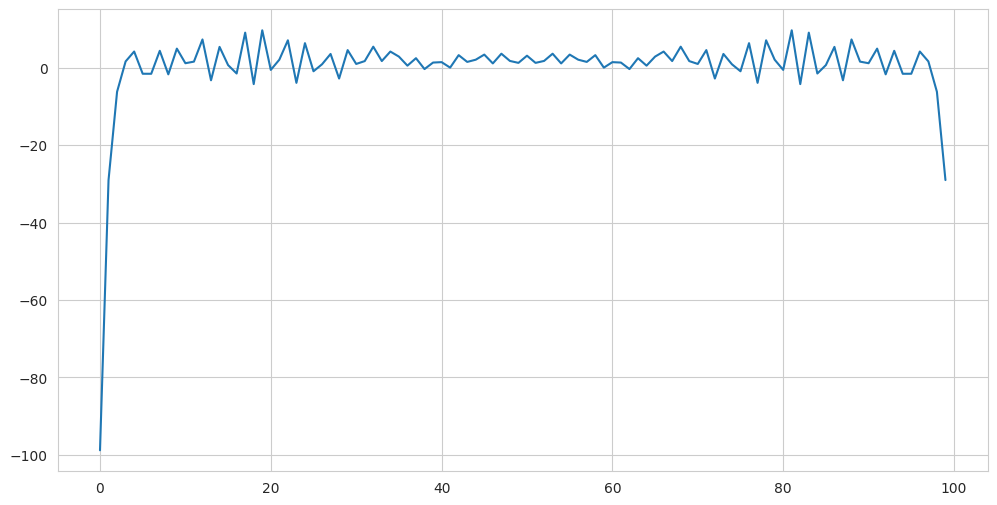

In [ ]:
plt.figure(figsize = (12, 6))
pd.Series(np.fft.fft(pd.Series(hand_x_list)[42])).plot()
plt.show()

In [ ]:
# converting the signals from time domain to frequency domain using FFT
hand_x_list_fft = pd.Series(hand_x_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
hand_y_list_fft = pd.Series(hand_y_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
hand_z_list_fft = pd.Series(hand_z_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
chest_x_list_fft = pd.Series(chest_x_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
chest_y_list_fft = pd.Series(chest_y_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
chest_z_list_fft = pd.Series(chest_z_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
ankle_x_list_fft = pd.Series(ankle_x_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
ankle_y_list_fft = pd.Series(ankle_y_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
ankle_z_list_fft = pd.Series(ankle_z_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
handGyro_x_list_fft = pd.Series(handGyro_x_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
handGyro_y_list_fft = pd.Series(handGyro_y_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
handGyro_z_list_fft = pd.Series(handGyro_z_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
chestGyro_x_list_fft = pd.Series(chestGyro_x_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
chestGyro_y_list_fft = pd.Series(chestGyro_y_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
chestGyro_z_list_fft = pd.Series(chestGyro_z_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
ankleGyro_x_list_fft = pd.Series(ankleGyro_x_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
ankleGyro_y_list_fft = pd.Series(ankleGyro_y_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
ankleGyro_z_list_fft = pd.Series(ankleGyro_z_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])

# mean
features['handAcc_x_mean_fft'] = pd.Series(hand_x_list_fft).apply(lambda x: x.mean())
features['handAcc_y_mean_fft'] = pd.Series(hand_y_list_fft).apply(lambda x: x.mean())
features['handAcc_z_mean_fft'] = pd.Series(hand_z_list_fft).apply(lambda x: x.mean())
features['chestAcc_x_mean_fft'] = pd.Series(chest_x_list_fft).apply(lambda x: x.mean())
features['chestAcc_y_mean_fft'] = pd.Series(chest_y_list_fft).apply(lambda x: x.mean())
features['chestAcc_z_mean_fft'] = pd.Series(chest_z_list_fft).apply(lambda x: x.mean())
features['ankleAcc_x_mean_fft'] = pd.Series(ankle_x_list_fft).apply(lambda x: x.mean())
features['ankleAcc_y_mean_fft'] = pd.Series(ankle_y_list_fft).apply(lambda x: x.mean())
features['ankleAcc_z_mean_fft'] = pd.Series(ankle_z_list_fft).apply(lambda x: x.mean())
features['handGyro_x_mean_fft'] = pd.Series(handGyro_x_list_fft).apply(lambda x: x.mean())
features['handGyro_y_mean_fft'] = pd.Series(handGyro_y_list_fft).apply(lambda x: x.mean())
features['handGyro_z_mean_fft'] = pd.Series(handGyro_z_list_fft).apply(lambda x: x.mean())
features['chestGyro_x_mean_fft'] = pd.Series(chestGyro_x_list_fft).apply(lambda x: x.mean())
features['chestGyro_y_mean_fft'] = pd.Series(chestGyro_y_list_fft).apply(lambda x: x.mean())
features['chestGyro_z_mean_fft'] = pd.Series(chestGyro_z_list_fft).apply(lambda x: x.mean())
features['ankleGyro_x_mean_fft'] = pd.Series(ankleGyro_x_list_fft).apply(lambda x: x.mean())
features['ankleGyro_y_mean_fft'] = pd.Series(ankleGyro_y_list_fft).apply(lambda x: x.mean())
features['ankleGyro_z_mean_fft'] = pd.Series(ankleGyro_z_list_fft).apply(lambda x: x.mean())

# std dev
features['handAcc_x_std_fft'] = pd.Series(hand_x_list_fft).apply(lambda x: x.std())
features['handAcc_y_std_fft'] = pd.Series(hand_y_list_fft).apply(lambda x: x.std())
features['handAcc_z_std_fft'] = pd.Series(hand_z_list_fft).apply(lambda x: x.std())
features['chestAcc_x_std_fft'] = pd.Series(chest_x_list_fft).apply(lambda x: x.std())
features['chestAcc_y_std_fft'] = pd.Series(chest_y_list_fft).apply(lambda x: x.std())
features['chestAcc_z_std_fft'] = pd.Series(chest_z_list_fft).apply(lambda x: x.std())
features['ankleAcc_x_std_fft'] = pd.Series(ankle_x_list_fft).apply(lambda x: x.std())
features['ankleAcc_y_std_fft'] = pd.Series(ankle_y_list_fft).apply(lambda x: x.std())
features['ankleAcc_z_std_fft'] = pd.Series(ankle_z_list_fft).apply(lambda x: x.std())
features['handGyro_x_std_fft'] = pd.Series(handGyro_x_list_fft).apply(lambda x: x.std())
features['handGyro_y_std_fft'] = pd.Series(handGyro_y_list_fft).apply(lambda x: x.std())
features['handGyro_z_std_fft'] = pd.Series(handGyro_z_list_fft).apply(lambda x: x.std())
features['chestGyro_x_std_fft'] = pd.Series(chestGyro_x_list_fft).apply(lambda x: x.std())
features['chestGyro_y_std_fft'] = pd.Series(chestGyro_y_list_fft).apply(lambda x: x.std())
features['chestGyro_z_std_fft'] = pd.Series(chestGyro_z_list_fft).apply(lambda x: x.std())
features['ankleGyro_x_std_fft'] = pd.Series(ankleGyro_x_list_fft).apply(lambda x: x.std())
features['ankleGyro_y_std_fft'] = pd.Series(ankleGyro_y_list_fft).apply(lambda x: x.std())
features['ankleGyro_z_std_fft'] = pd.Series(ankleGyro_z_list_fft).apply(lambda x: x.std())

# avg absolute diff
features['handAcc_x_aad_fft'] = pd.Series(hand_x_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
features['handAcc_y_aad_fft'] = pd.Series(hand_y_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
features['handAcc_z_aad_fft'] = pd.Series(hand_z_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
features['chestAcc_x_aad_fft'] = pd.Series(chest_x_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
features['chestAcc_y_aad_fft'] = pd.Series(chest_y_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
features['chestAcc_z_aad_fft'] = pd.Series(chest_z_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
features['ankleAcc_x_aad_fft'] = pd.Series(ankle_x_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
features['ankleAcc_y_aad_fft'] = pd.Series(ankle_y_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
features['ankleAcc_z_aad_fft'] = pd.Series(ankle_z_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
features['handGyro_x_aad_fft'] = pd.Series(handGyro_x_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
features['handGyro_y_aad_fft'] = pd.Series(handGyro_y_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
features['handGyro_z_aad_fft'] = pd.Series(handGyro_z_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
features['chestGyro_x_aad_fft'] = pd.Series(chestGyro_x_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
features['chestGyro_y_aad_fft'] = pd.Series(chestGyro_y_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
features['chestGyro_z_aad_fft'] = pd.Series(chestGyro_z_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
features['ankleGyro_x_aad_fft'] = pd.Series(ankleGyro_x_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
features['ankleGyro_y_aad_fft'] = pd.Series(ankleGyro_y_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
features['ankleGyro_z_aad_fft'] = pd.Series(ankleGyro_z_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# min
features['handAcc_x_min_fft'] = pd.Series(hand_x_list_fft).apply(lambda x: x.min())
features['handAcc_y_min_fft'] = pd.Series(hand_y_list_fft).apply(lambda x: x.min())
features['handAcc_z_min_fft'] = pd.Series(hand_z_list_fft).apply(lambda x: x.min())
features['chestAcc_x_min_fft'] = pd.Series(chest_x_list_fft).apply(lambda x: x.min())
features['chestAcc_y_min_fft'] = pd.Series(chest_y_list_fft).apply(lambda x: x.min())
features['chestAcc_z_min_fft'] = pd.Series(chest_z_list_fft).apply(lambda x: x.min())
features['ankleAcc_x_min_fft'] = pd.Series(ankle_x_list_fft).apply(lambda x: x.min())
features['ankleAcc_y_min_fft'] = pd.Series(ankle_y_list_fft).apply(lambda x: x.min())
features['ankleAcc_z_min_fft'] = pd.Series(ankle_z_list_fft).apply(lambda x: x.min())
features['handGyro_x_min_fft'] = pd.Series(handGyro_x_list_fft).apply(lambda x: x.min())
features['handGyro_y_min_fft'] = pd.Series(handGyro_y_list_fft).apply(lambda x: x.min())
features['handGyro_z_min_fft'] = pd.Series(handGyro_z_list_fft).apply(lambda x: x.min())
features['chestGyro_x_min_fft'] = pd.Series(chestGyro_x_list_fft).apply(lambda x: x.min())
features['chestGyro_y_min_fft'] = pd.Series(chestGyro_y_list_fft).apply(lambda x: x.min())
features['chestGyro_z_min_fft'] = pd.Series(chestGyro_z_list_fft).apply(lambda x: x.min())
features['ankleGyro_x_min_fft'] = pd.Series(ankleGyro_x_list_fft).apply(lambda x: x.min())
features['ankleGyro_y_min_fft'] = pd.Series(ankleGyro_y_list_fft).apply(lambda x: x.min())
features['ankleGyro_z_min_fft'] = pd.Series(ankleGyro_z_list_fft).apply(lambda x: x.min())

# max
features['handAcc_x_max_fft'] = pd.Series(hand_x_list_fft).apply(lambda x: x.max())
features['handAcc_y_max_fft'] = pd.Series(hand_y_list_fft).apply(lambda x: x.max())
features['handAcc_z_max_fft'] = pd.Series(hand_z_list_fft).apply(lambda x: x.max())
features['chestAcc_x_max_fft'] = pd.Series(chest_x_list_fft).apply(lambda x: x.max())
features['chestAcc_y_max_fft'] = pd.Series(chest_y_list_fft).apply(lambda x: x.max())
features['chestAcc_z_max_fft'] = pd.Series(chest_z_list_fft).apply(lambda x: x.max())
features['ankleAcc_x_max_fft'] = pd.Series(ankle_x_list_fft).apply(lambda x: x.max())
features['ankleAcc_y_max_fft'] = pd.Series(ankle_y_list_fft).apply(lambda x: x.max())
features['ankleAcc_z_max_fft'] = pd.Series(ankle_z_list_fft).apply(lambda x: x.max())
features['handGyro_x_max_fft'] = pd.Series(handGyro_x_list_fft).apply(lambda x: x.max())
features['handGyro_y_max_fft'] = pd.Series(handGyro_y_list_fft).apply(lambda x: x.max())
features['handGyro_z_max_fft'] = pd.Series(handGyro_z_list_fft).apply(lambda x: x.max())
features['chestGyro_x_max_fft'] = pd.Series(chestGyro_x_list_fft).apply(lambda x: x.max())
features['chestGyro_y_max_fft'] = pd.Series(chestGyro_y_list_fft).apply(lambda x: x.max())
features['chestGyro_z_max_fft'] = pd.Series(chestGyro_z_list_fft).apply(lambda x: x.max())
features['ankleGyro_x_max_fft'] = pd.Series(ankleGyro_x_list_fft).apply(lambda x: x.max())
features['ankleGyro_y_max_fft'] = pd.Series(ankleGyro_y_list_fft).apply(lambda x: x.max())
features['ankleGyro_z_max_fft'] = pd.Series(ankleGyro_z_list_fft).apply(lambda x: x.max())

# max-min diff
features['handAcc_x_maxmin_diff_fft'] = features['handAcc_x_max_fft'] - features['handAcc_x_min_fft']
features['handAcc_y_maxmin_diff_fft'] = features['handAcc_y_max_fft'] - features['handAcc_y_min_fft']
features['handAcc_z_maxmin_diff_fft'] = features['handAcc_z_max_fft'] - features['handAcc_z_min_fft']
features['chestAcc_x_maxmin_diff_fft'] = features['chestAcc_x_max_fft'] - features['chestAcc_x_min_fft']
features['chestAcc_y_maxmin_diff_fft'] = features['chestAcc_y_max_fft'] - features['chestAcc_y_min_fft']
features['chestAcc_z_maxmin_diff_fft'] = features['chestAcc_z_max_fft'] - features['chestAcc_z_min_fft']
features['ankleAcc_x_maxmin_diff_fft'] = features['ankleAcc_x_max_fft'] - features['ankleAcc_x_min_fft']
features['ankleAcc_y_maxmin_diff_fft'] = features['ankleAcc_y_max_fft'] - features['ankleAcc_y_min_fft']
features['ankleAcc_z_maxmin_diff_fft'] = features['ankleAcc_z_max_fft'] - features['ankleAcc_z_min_fft']
features['handGyro_x_maxmin_diff_fft'] = features['handGyro_x_max_fft'] - features['handGyro_x_min_fft']
features['handGyro_y_maxmin_diff_fft'] = features['handGyro_y_max_fft'] - features['handGyro_y_min_fft']
features['handGyro_z_maxmin_diff_fft'] = features['handGyro_z_max_fft'] - features['handGyro_z_min_fft']
features['chestGyro_x_maxmin_diff_fft'] = features['chestGyro_x_max_fft'] - features['chestGyro_x_min_fft']
features['chestGyro_y_maxmin_diff_fft'] = features['chestGyro_y_max_fft'] - features['chestGyro_y_min_fft']
features['chestGyro_z_maxmin_diff_fft'] = features['chestGyro_z_max_fft'] - features['chestGyro_z_min_fft']
features['ankleGyro_x_maxmin_diff_fft'] = features['ankleGyro_x_max_fft'] - features['ankleGyro_x_min_fft']
features['ankleGyro_y_maxmin_diff_fft'] = features['ankleGyro_y_max_fft'] - features['ankleGyro_y_min_fft']
features['ankleGyro_z_maxmin_diff_fft'] = features['ankleGyro_z_max_fft'] - features['ankleGyro_z_min_fft']

# median
features['handAcc_x_median_fft'] = pd.Series(hand_x_list_fft).apply(lambda x: np.median(x))
features['handAcc_y_median_fft'] = pd.Series(hand_y_list_fft).apply(lambda x: np.median(x))
features['handAcc_z_median_fft'] = pd.Series(hand_z_list_fft).apply(lambda x: np.median(x))
features['chestAcc_x_median_fft'] = pd.Series(chest_x_list_fft).apply(lambda x: np.median(x))
features['chestAcc_y_median_fft'] = pd.Series(chest_y_list_fft).apply(lambda x: np.median(x))
features['chestAcc_z_median_fft'] = pd.Series(chest_z_list_fft).apply(lambda x: np.median(x))
features['ankleAcc_x_median_fft'] = pd.Series(ankle_x_list_fft).apply(lambda x: np.median(x))
features['ankleAcc_y_median_fft'] = pd.Series(ankle_y_list_fft).apply(lambda x: np.median(x))
features['ankleAcc_z_median_fft'] = pd.Series(ankle_z_list_fft).apply(lambda x: np.median(x))
features['handGyro_x_median_fft'] = pd.Series(handGyro_x_list_fft).apply(lambda x: np.median(x))
features['handGyro_y_median_fft'] = pd.Series(handGyro_y_list_fft).apply(lambda x: np.median(x))
features['handGyro_z_median_fft'] = pd.Series(handGyro_z_list_fft).apply(lambda x: np.median(x))
features['chestGyro_x_median_fft'] = pd.Series(chestGyro_x_list_fft).apply(lambda x: np.median(x))
features['chestGyro_y_median_fft'] = pd.Series(chestGyro_y_list_fft).apply(lambda x: np.median(x))
features['chestGyro_z_median_fft'] = pd.Series(chestGyro_z_list_fft).apply(lambda x: np.median(x))
features['ankleGyro_x_median_fft'] = pd.Series(ankleGyro_x_list_fft).apply(lambda x: np.median(x))
features['ankleGyro_y_median_fft'] = pd.Series(ankleGyro_y_list_fft).apply(lambda x: np.median(x))
features['ankleGyro_z_median_fft'] = pd.Series(ankleGyro_z_list_fft).apply(lambda x: np.median(x))

# median abs dev 
features['handAcc_x_mad_fft'] = pd.Series(hand_x_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
features['handAcc_y_mad_fft'] = pd.Series(hand_y_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
features['handAcc_z_mad_fft'] = pd.Series(hand_z_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
features['chestAcc_x_mad_fft'] = pd.Series(chest_x_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
features['chestAcc_y_mad_fft'] = pd.Series(chest_y_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
features['chestAcc_z_mad_fft'] = pd.Series(chest_z_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
features['ankleAcc_x_mad_fft'] = pd.Series(ankle_x_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
features['ankleAcc_y_mad_fft'] = pd.Series(ankle_y_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
features['ankleAcc_z_mad_fft'] = pd.Series(ankle_z_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
features['handGyro_x_mad_fft'] = pd.Series(handGyro_x_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
features['handGyro_y_mad_fft'] = pd.Series(handGyro_y_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
features['handGyro_z_mad_fft'] = pd.Series(handGyro_z_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
features['chestGyro_x_mad_fft'] = pd.Series(chestGyro_x_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
features['chestGyro_y_mad_fft'] = pd.Series(chestGyro_y_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
features['chestGyro_z_mad_fft'] = pd.Series(chestGyro_z_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
features['ankleGyro_x_mad_fft'] = pd.Series(ankleGyro_x_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
features['ankleGyro_y_mad_fft'] = pd.Series(ankleGyro_y_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
features['ankleGyro_z_mad_fft'] = pd.Series(ankleGyro_z_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# interquartile range
features['handAcc_x_IQR_fft'] = pd.Series(hand_x_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
features['handAcc_y_IQR_fft'] = pd.Series(hand_y_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
features['handAcc_z_IQR_fft'] = pd.Series(hand_z_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
features['chestAcc_x_IQR_fft'] = pd.Series(chest_x_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
features['chestAcc_y_IQR_fft'] = pd.Series(chest_y_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
features['chestAcc_z_IQR_fft'] = pd.Series(chest_z_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
features['ankleAcc_x_IQR_fft'] = pd.Series(ankle_x_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
features['ankleAcc_y_IQR_fft'] = pd.Series(ankle_y_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
features['ankleAcc_z_IQR_fft'] = pd.Series(ankle_z_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
features['handGyro_x_IQR_fft'] = pd.Series(handGyro_x_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
features['handGyro_y_IQR_fft'] = pd.Series(handGyro_y_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
features['handGyro_z_IQR_fft'] = pd.Series(handGyro_z_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
features['chestGyro_x_IQR_fft'] = pd.Series(chestGyro_x_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
features['chestGyro_y_IQR_fft'] = pd.Series(chestGyro_y_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
features['chestGyro_z_IQR_fft'] = pd.Series(chestGyro_z_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
features['ankleGyro_x_IQR_fft'] = pd.Series(ankleGyro_x_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
features['ankleGyro_y_IQR_fft'] = pd.Series(ankleGyro_y_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
features['ankleGyro_z_IQR_fft'] = pd.Series(ankleGyro_z_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# # negtive count
# features['handAcc_x_neg_count'] = pd.Series(hand_x_list).apply(lambda x: np.sum(x < 0))
# features['handAcc_y_neg_count'] = pd.Series(hand_y_list).apply(lambda x: np.sum(x < 0))
# features['handAcc_z_neg_count'] = pd.Series(hand_z_list).apply(lambda x: np.sum(x < 0))

# # positive count
# features['handAcc_x_pos_count'] = pd.Series(hand_x_list).apply(lambda x: np.sum(x > 0))
# features['handAcc_y_pos_count'] = pd.Series(hand_y_list).apply(lambda x: np.sum(x > 0))
# features['handAcc_z_pos_count'] = pd.Series(hand_z_list).apply(lambda x: np.sum(x > 0))

# # values above mean
# features['handAcc_x_above_mean'] = pd.Series(hand_x_list).apply(lambda x: np.sum(x > x.mean()))
# features['handAcc_y_above_mean'] = pd.Series(hand_y_list).apply(lambda x: np.sum(x > x.mean()))
# features['handAcc_z_above_mean'] = pd.Series(hand_z_list).apply(lambda x: np.sum(x > x.mean()))

# # number of peaks
# features['hand_x_peak_count'] = pd.Series(hand_x_list).apply(lambda x: len(find_peaks(x)[0]))
# features['hand_y_peak_count'] = pd.Series(hand_y_list).apply(lambda x: len(find_peaks(x)[0]))
# features['hand_z_peak_count'] = pd.Series(hand_z_list).apply(lambda x: len(find_peaks(x)[0]))

# skewness
features['handAcc_x_skewness_fft'] = pd.Series(hand_x_list_fft).apply(lambda x: stats.skew(x))
features['handAcc_y_skewness_fft'] = pd.Series(hand_y_list_fft).apply(lambda x: stats.skew(x))
features['handAcc_z_skewness_fft'] = pd.Series(hand_z_list_fft).apply(lambda x: stats.skew(x))
features['chestAcc_x_skewness_fft'] = pd.Series(chest_x_list_fft).apply(lambda x: stats.skew(x))
features['chestAcc_y_skewness_fft'] = pd.Series(chest_y_list_fft).apply(lambda x: stats.skew(x))
features['chestAcc_z_skewness_fft'] = pd.Series(chest_z_list_fft).apply(lambda x: stats.skew(x))
features['ankleAcc_x_skewness_fft'] = pd.Series(ankle_x_list_fft).apply(lambda x: stats.skew(x))
features['ankleAcc_y_skewness_fft'] = pd.Series(ankle_y_list_fft).apply(lambda x: stats.skew(x))
features['ankleAcc_z_skewness_fft'] = pd.Series(ankle_z_list_fft).apply(lambda x: stats.skew(x))
features['handGyro_x_skewness_fft'] = pd.Series(handGyro_x_list_fft).apply(lambda x: stats.skew(x))
features['handGyro_y_skewness_fft'] = pd.Series(handGyro_y_list_fft).apply(lambda x: stats.skew(x))
features['handGyro_z_skewness_fft'] = pd.Series(handGyro_z_list_fft).apply(lambda x: stats.skew(x))
features['chestGyro_x_skewness_fft'] = pd.Series(chestGyro_x_list_fft).apply(lambda x: stats.skew(x))
features['chestGyro_y_skewness_fft'] = pd.Series(chestGyro_y_list_fft).apply(lambda x: stats.skew(x))
features['chestGyro_z_skewness_fft'] = pd.Series(chestGyro_z_list_fft).apply(lambda x: stats.skew(x))
features['ankleGyro_x_skewness_fft'] = pd.Series(ankleGyro_x_list_fft).apply(lambda x: stats.skew(x))
features['ankleGyro_y_skewness_fft'] = pd.Series(ankleGyro_y_list_fft).apply(lambda x: stats.skew(x))
features['ankleGyro_z_skewness_fft'] = pd.Series(ankleGyro_z_list_fft).apply(lambda x: stats.skew(x))

# kurtosis
features['handAcc_x_kurtosis_fft'] = pd.Series(hand_x_list_fft).apply(lambda x: stats.kurtosis(x))
features['handAcc_y_kurtosis_fft'] = pd.Series(hand_y_list_fft).apply(lambda x: stats.kurtosis(x))
features['handAcc_z_kurtosis_fft'] = pd.Series(hand_z_list_fft).apply(lambda x: stats.kurtosis(x))
features['chestAcc_x_kurtosis_fft'] = pd.Series(chest_x_list_fft).apply(lambda x: stats.kurtosis(x))
features['chestAcc_y_kurtosis_fft'] = pd.Series(chest_y_list_fft).apply(lambda x: stats.kurtosis(x))
features['chestAcc_z_kurtosis_fft'] = pd.Series(chest_z_list_fft).apply(lambda x: stats.kurtosis(x))
features['ankleAcc_x_kurtosis_fft'] = pd.Series(ankle_x_list_fft).apply(lambda x: stats.kurtosis(x))
features['ankleAcc_y_kurtosis_fft'] = pd.Series(ankle_y_list_fft).apply(lambda x: stats.kurtosis(x))
features['ankleAcc_z_kurtosis_fft'] = pd.Series(ankle_z_list_fft).apply(lambda x: stats.kurtosis(x))
features['handGyro_x_kurtosis_fft'] = pd.Series(handGyro_x_list_fft).apply(lambda x: stats.kurtosis(x))
features['handGyro_y_kurtosis_fft'] = pd.Series(handGyro_y_list_fft).apply(lambda x: stats.kurtosis(x))
features['handGyro_z_kurtosis_fft'] = pd.Series(handGyro_z_list_fft).apply(lambda x: stats.kurtosis(x))
features['chestGyro_x_kurtosis_fft'] = pd.Series(chestGyro_x_list_fft).apply(lambda x: stats.kurtosis(x))
features['chestGyro_y_kurtosis_fft'] = pd.Series(chestGyro_y_list_fft).apply(lambda x: stats.kurtosis(x))
features['chestGyro_z_kurtosis_fft'] = pd.Series(chestGyro_z_list_fft).apply(lambda x: stats.kurtosis(x))
features['ankleGyro_x_kurtosis_fft'] = pd.Series(ankleGyro_x_list_fft).apply(lambda x: stats.kurtosis(x))
features['ankleGyro_y_kurtosis_fft'] = pd.Series(ankleGyro_y_list_fft).apply(lambda x: stats.kurtosis(x))
features['ankleGyro_z_kurtosis_fft'] = pd.Series(ankleGyro_z_list_fft).apply(lambda x: stats.kurtosis(x))

# energy
features['handAcc_x_energy_fft'] = pd.Series(hand_x_list_fft).apply(lambda x: np.sum(x**2)/100)
features['handAcc_y_energy_fft'] = pd.Series(hand_y_list_fft).apply(lambda x: np.sum(x**2)/100)
features['handAcc_z_energy_fft'] = pd.Series(hand_z_list_fft).apply(lambda x: np.sum(x**2/100))
features['chestAcc_x_energy_fft'] = pd.Series(chest_x_list_fft).apply(lambda x: np.sum(x**2)/100)
features['chestAcc_y_energy_fft'] = pd.Series(chest_y_list_fft).apply(lambda x: np.sum(x**2)/100)
features['chestAcc_z_energy_fft'] = pd.Series(chest_z_list_fft).apply(lambda x: np.sum(x**2/100))
features['ankleAcc_x_energy_fft'] = pd.Series(ankle_x_list_fft).apply(lambda x: np.sum(x**2)/100)
features['ankleAcc_y_energy_fft'] = pd.Series(ankle_y_list_fft).apply(lambda x: np.sum(x**2)/100)
features['ankleAcc_z_energy_fft'] = pd.Series(ankle_z_list_fft).apply(lambda x: np.sum(x**2/100))
features['handGyro_x_energy_fft'] = pd.Series(handGyro_x_list_fft).apply(lambda x: np.sum(x**2)/100)
features['handGyro_y_energy_fft'] = pd.Series(handGyro_y_list_fft).apply(lambda x: np.sum(x**2)/100)
features['handGyro_z_energy_fft'] = pd.Series(handGyro_z_list_fft).apply(lambda x: np.sum(x**2/100))
features['chestGyro_x_energy_fft'] = pd.Series(chestGyro_x_list_fft).apply(lambda x: np.sum(x**2)/100)
features['chestGyro_y_energy_fft'] = pd.Series(chestGyro_y_list_fft).apply(lambda x: np.sum(x**2)/100)
features['chestGyro_z_energy_fft'] = pd.Series(chestGyro_z_list_fft).apply(lambda x: np.sum(x**2/100))
features['ankleGyro_x_energy_fft'] = pd.Series(ankleGyro_x_list_fft).apply(lambda x: np.sum(x**2)/100)
features['ankleGyro_y_energy_fft'] = pd.Series(ankleGyro_y_list_fft).apply(lambda x: np.sum(x**2)/100)
features['ankleGyro_z_energy_fft'] = pd.Series(ankleGyro_z_list_fft).apply(lambda x: np.sum(x**2/100))

# avg resultant
features['handAcc_avg_resultant_fft'] = [i.mean() for i in ((pd.Series(hand_x_list_fft)**2 + pd.Series(hand_y_list_fft)**2 + pd.Series(hand_z_list_fft)**2)**0.5)]
features['chestAcc_avg_resultant_fft'] = [i.mean() for i in ((pd.Series(chest_x_list_fft)**2 + pd.Series(chest_y_list_fft)**2 + pd.Series(chest_z_list_fft)**2)**0.5)]
features['ankleAcc_avg_resultant_fft'] = [i.mean() for i in ((pd.Series(ankle_x_list_fft)**2 + pd.Series(ankle_y_list_fft)**2 + pd.Series(ankle_z_list_fft)**2)**0.5)]
features['handGyro_avg_resultant_fft'] = [i.mean() for i in ((pd.Series(handGyro_x_list_fft)**2 + pd.Series(handGyro_y_list_fft)**2 + pd.Series(handGyro_z_list_fft)**2)**0.5)]
features['chestGyro_avg_resultant_fft'] = [i.mean() for i in ((pd.Series(chestGyro_x_list_fft)**2 + pd.Series(chestGyro_y_list_fft)**2 + pd.Series(chestGyro_z_list_fft)**2)**0.5)]
features['ankleGyro_avg_resultant_fft'] = [i.mean() for i in ((pd.Series(ankleGyro_x_list_fft)**2 + pd.Series(ankleGyro_y_list_fft)**2 + pd.Series(ankleGyro_z_list_fft)**2)**0.5)]

# signal magnitude area
features['handAcc_sma_fft'] =    pd.Series(hand_x_list_fft).apply(lambda x: np.sum(abs(x)/100)) + pd.Series(hand_y_list_fft).apply(lambda x: np.sum(abs(x)/100)) \
                  + pd.Series(hand_z_list_fft).apply(lambda x: np.sum(abs(x)/100))
features['chestAcc_sma_fft'] =    pd.Series(chest_x_list_fft).apply(lambda x: np.sum(abs(x)/100)) + pd.Series(chest_y_list_fft).apply(lambda x: np.sum(abs(x)/100)) \
                  + pd.Series(chest_z_list_fft).apply(lambda x: np.sum(abs(x)/100))
features['ankleAcc_sma_fft'] =    pd.Series(ankle_x_list_fft).apply(lambda x: np.sum(abs(x)/100)) + pd.Series(ankle_y_list_fft).apply(lambda x: np.sum(abs(x)/100)) \
                  + pd.Series(ankle_z_list_fft).apply(lambda x: np.sum(abs(x)/100))
features['handGyro_sma_fft'] =    pd.Series(handGyro_x_list_fft).apply(lambda x: np.sum(abs(x)/100)) + pd.Series(handGyro_y_list_fft).apply(lambda x: np.sum(abs(x)/100)) \
                  + pd.Series(handGyro_z_list_fft).apply(lambda x: np.sum(abs(x)/100))
features['chestGyro_sma_fft'] =    pd.Series(chestGyro_x_list).apply(lambda x: np.sum(abs(x)/100)) + pd.Series(chestGyro_y_list_fft).apply(lambda x: np.sum(abs(x)/100)) \
                  + pd.Series(chestGyro_z_list_fft).apply(lambda x: np.sum(abs(x)/100))
features['ankleGyro_sma_fft'] =    pd.Series(ankleGyro_x_list_fft).apply(lambda x: np.sum(abs(x)/100)) + pd.Series(ankleGyro_y_list_fft).apply(lambda x: np.sum(abs(x)/100)) \
                  + pd.Series(ankleGyro_z_list_fft).apply(lambda x: np.sum(abs(x)/100))
                  

In [ ]:
features.shape

(18683, 456)

In [ ]:
features.head()

,handAcc_x_mean,handAcc_y_mean,handAcc_z_mean,chestAcc_x_mean,chestAcc_y_mean,chestAcc_z_mean,ankleAcc_x_mean,ankleAcc_y_mean,ankleAcc_z_mean,handGyro_x_mean,...,ankleAcc_avg_resultant_fft,handGyro_avg_resultant_fft,chestGyro_avg_resultant_fft,ankleGyro_avg_resultant_fft,handAcc_sma_fft,chestAcc_sma_fft,ankleAcc_sma_fft,handGyro_sma_fft,chestGyro_sma_fft,ankleGyro_sma_fft
0,2.311118,9.034105,3.042016,0.881934,9.691373,-1.412290,9.798429,-0.292610,-1.469040,-0.085050,...,1.410353,1.929717,0.399125,0.372757,4.053371,1.395540,1.121781,1.438637,0.225145,0.292905
1,2.600422,8.729155,3.518079,0.773465,9.712594,-1.333397,9.789881,-0.291540,-1.454084,-0.075318,...,1.435189,1.608525,0.381245,0.365963,3.943911,1.417226,1.144664,1.191611,0.223888,0.289060
2,2.740950,8.428938,4.179716,0.722940,9.728473,-1.181610,9.788009,-0.319180,-1.462035,-0.051769,...,1.445185,2.480306,0.390951,0.356694,3.075573,1.331748,1.141117,1.882177,0.220997,0.285292
3,2.639110,7.971298,4.844796,0.685844,9.723353,-1.121473,9.784058,-0.342291,-1.465020,-0.299351,...,1.314516,2.787729,0.511086,0.356337,5.910323,1.348898,1.060128,2.102706,0.304512,0.279517
4,2.226574,7.765582,5.321173,0.479372,9.730533,-1.160861,9.781218,-0.297933,-1.454905,-0.064233,...,1.391809,3.629767,0.549374,0.379964,5.546910,1.572111,1.084463,2.708416,0.331145,0.298237


In [ ]:
labels

['sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'si

In [ ]:
labels = np.array(labels)
labels

array(['sitting', 'sitting', 'sitting', ..., 'running', 'running',
       'running'], dtype='<U17')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay

In [ ]:
random_seed = 42
X_train, X_test, y_train, y_test = train_test_split(
        features, labels, test_size=0.2, random_state=random_seed)

In [ ]:
# standardization
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

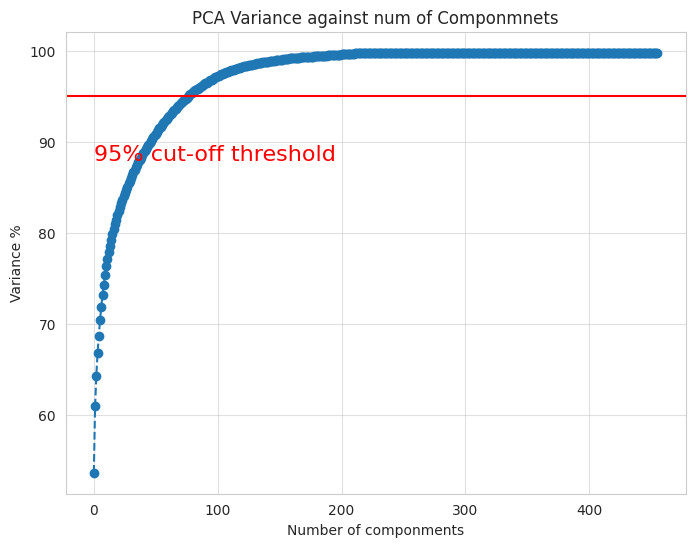

In [ ]:
pca = PCA()
pca.fit(scaled_X_train)
variance = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)


plt.rcParams["figure.figsize"] = (8,6)
plt.plot(variance, marker='o', linestyle='--')
plt.title("PCA Variance against num of Componmnets")
plt.ylabel("Variance %")
plt.xlabel("Number of componments")
l = plt.axhline(95, color="red")
plt.text(0.5, 88, '95% cut-off threshold', color = 'red', fontsize=16)
plt.grid(True, alpha = 0.6)

plt.show()

In [ ]:
pca = PCA(n_components=85)
pca_X_train=pca.fit_transform(scaled_X_train)
pca_X_test=pca.transform(scaled_X_test)

In [ ]:
# logistic regression model
lr = LogisticRegression(random_state = random_seed)
lr.fit(pca_X_train, y_train)
y_pred_lr = lr.predict(pca_X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred_lr))
print("f1 score: ", f1_score(y_test, y_pred_lr, average='macro'))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred_lr))


Accuracy:  0.8934974578538935
f1 score:  0.889889918546273

 -------------Classification Report-------------

                   precision    recall  f1-score   support

 ascending_stairs       0.89      0.83      0.86       466
descending_stairs       0.95      0.77      0.85       448
          running       0.96      0.92      0.94       387
          sitting       0.85      0.91      0.88       750
         standing       0.79      0.88      0.84       754
          walking       0.97      0.96      0.97       932

         accuracy                           0.89      3737
        macro avg       0.90      0.88      0.89      3737
     weighted avg       0.90      0.89      0.89      3737



We managed to obtain overall accuracy of 89.4 % on the test data by using baseline logistic regression model on the engineered features. This is pretty good taking into consideration the fact that we just had 3 features of raw accelerometer data at the start. By using some complex classification models like tree-based ensembles, voting or stacking classifiers, there is a scope for the improvement in the accuracy and other performance metrics.

From the classification report it can be seen that the overall performance is quiet good for most of the activities. Although there is some difficulty in recognising the two stair climbing activities. This was kind of expected as these two are very similar activities. Let’s check the Confusion matrix.

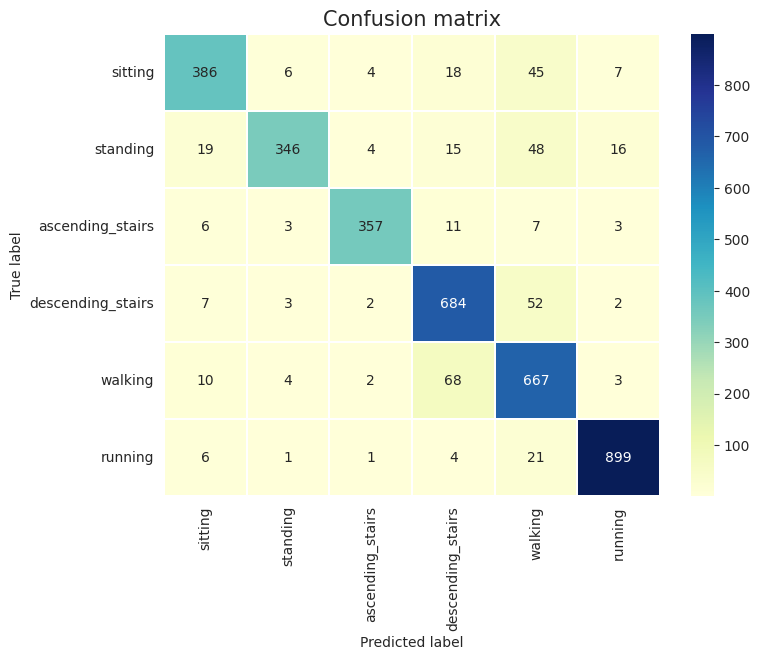

In [ ]:
labels = ['sitting', 'standing', 'ascending_stairs', 'descending_stairs', 'walking', 'running']
cm= confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, xticklabels=labels, yticklabels=labels, annot=True,linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
plt.title('Confusion matrix', fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Accuracy: 0.7944875568637945
f1 score:  0.7787937238551113

 -------------Classification Report-------------

                   precision    recall  f1-score   support

 ascending_stairs       0.73      0.66      0.69       466
descending_stairs       0.74      0.67      0.70       448
          running       0.75      0.91      0.82       387
          sitting       0.87      0.71      0.79       750
         standing       0.72      0.83      0.77       754
          walking       0.88      0.91      0.90       932

         accuracy                           0.79      3737
        macro avg       0.78      0.78      0.78      3737
     weighted avg       0.80      0.79      0.79      3737


 -------------Confusion matrix-------------



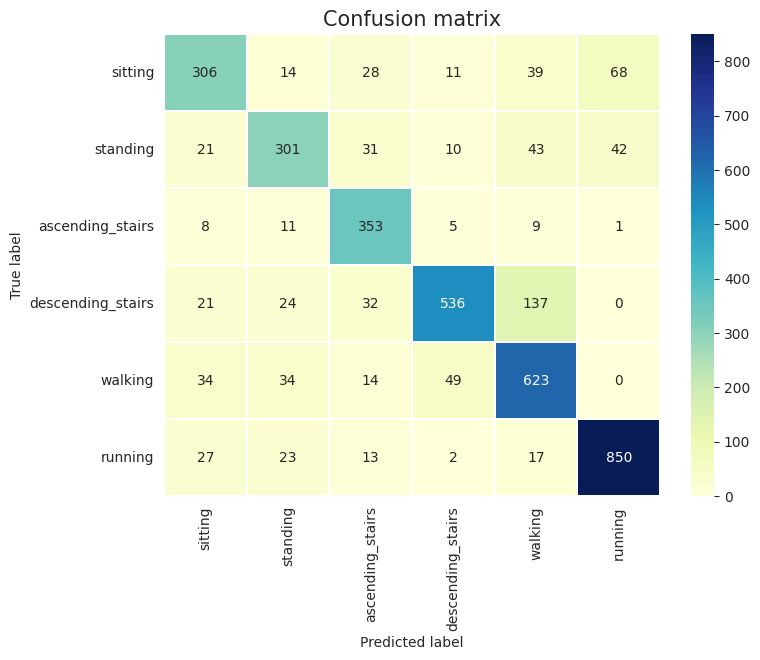

In [ ]:
# Gaussian Naive Bayes model
nb = GaussianNB()
nb.fit(pca_X_train, y_train)
y_pred_nb = nb.predict(pca_X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("f1 score: ", f1_score(y_test, y_pred_nb, average='macro'))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred_nb))
print("\n -------------Confusion matrix-------------\n")
cm_nb= confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, xticklabels=labels, yticklabels=labels, annot=True,linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
plt.title('Confusion matrix', fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Accuracy: 0.8423869413968423
f1 score:  0.8358561384188924

 -------------Classification Report-------------

                   precision    recall  f1-score   support

 ascending_stairs       0.81      0.80      0.80       466
descending_stairs       0.79      0.75      0.77       448
          running       0.91      0.90      0.91       387
          sitting       0.84      0.84      0.84       750
         standing       0.76      0.77      0.77       754
          walking       0.93      0.95      0.94       932

         accuracy                           0.84      3737
        macro avg       0.84      0.83      0.84      3737
     weighted avg       0.84      0.84      0.84      3737


 -------------Confusion matrix-------------



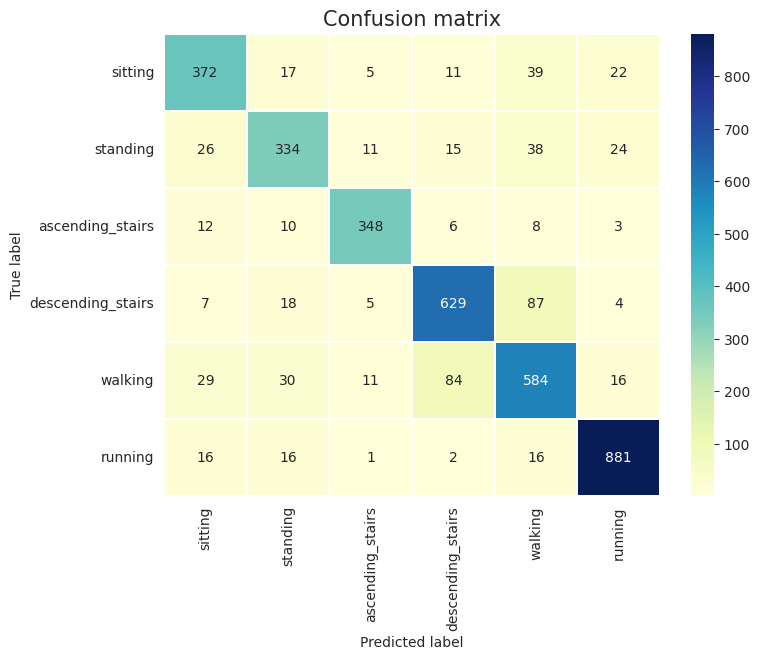

In [ ]:
# Decision Tree Classifier model
dtc = DecisionTreeClassifier(random_state = random_seed)
dtc.fit(pca_X_train, y_train)
y_pred_dtc = dtc.predict(pca_X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_dtc))
print("f1 score: ", f1_score(y_test, y_pred_dtc, average='macro'))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred_dtc))
print("\n -------------Confusion matrix-------------\n")
cm_dtc= confusion_matrix(y_test, y_pred_dtc)
sns.heatmap(cm_dtc, xticklabels=labels, yticklabels=labels, annot=True,linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
plt.title('Confusion matrix', fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Accuracy: 0.9076799571849077
f1 score:  0.9039893516803881

 -------------Classification Report-------------

                   precision    recall  f1-score   support

 ascending_stairs       0.91      0.83      0.87       466
descending_stairs       0.97      0.79      0.87       448
          running       0.99      0.90      0.95       387
          sitting       0.89      0.93      0.91       750
         standing       0.79      0.94      0.86       754
          walking       0.98      0.96      0.97       932

         accuracy                           0.91      3737
        macro avg       0.92      0.89      0.90      3737
     weighted avg       0.92      0.91      0.91      3737


 -------------Confusion matrix-------------



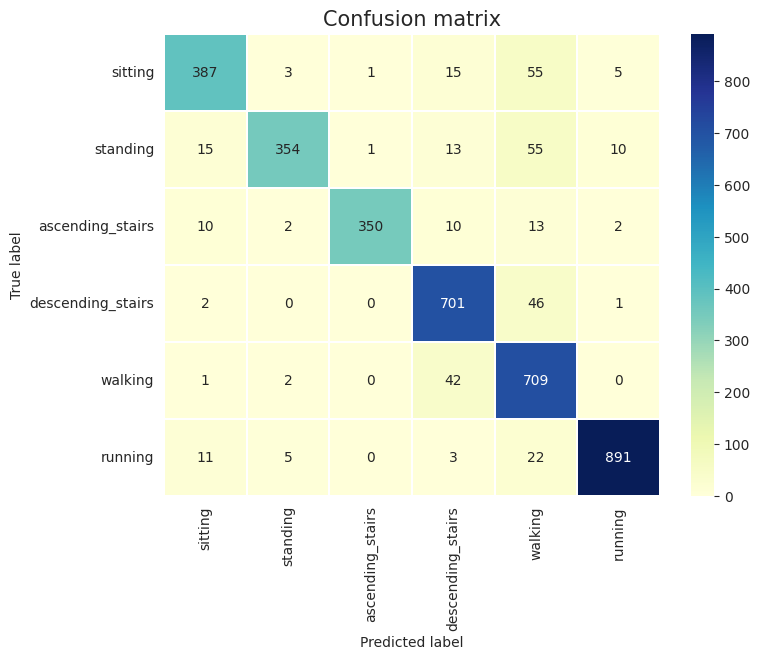

In [ ]:
# Random Forest Classifier model
rfc = RandomForestClassifier(random_state = random_seed)
rfc.fit(pca_X_train, y_train)
y_pred_rfc = rfc.predict(pca_X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_rfc))
print("f1 score: ", f1_score(y_test, y_pred_rfc, average='macro'))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred_rfc))
print("\n -------------Confusion matrix-------------\n")
cm_rfc= confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cm_rfc, xticklabels=labels, yticklabels=labels, annot=True,linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
plt.title('Confusion matrix', fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

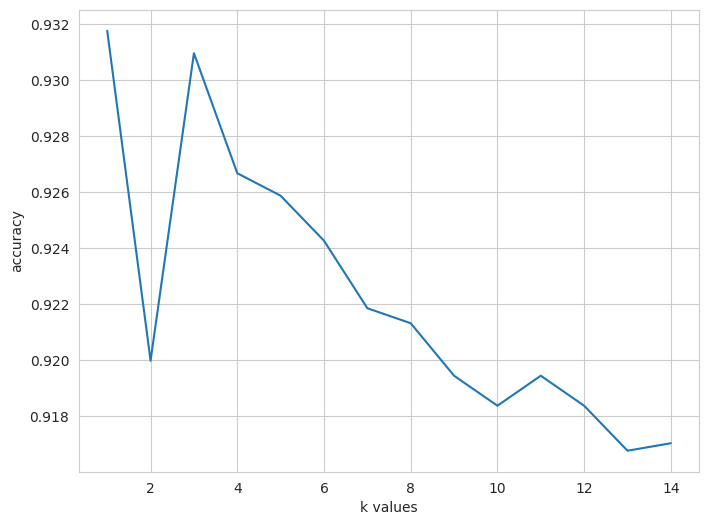

In [ ]:
# Findind k values in range(1,15)
score_list = []
for each in range(1,15):
    knn = KNeighborsClassifier(n_neighbors = each)
    knn.fit(pca_X_train,y_train)
    score_list.append(knn.score(pca_X_test,y_test))
    
plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()


Accuracy: 0.9309606636339309
f1 score:  0.924302174537759

 -------------Classification Report-------------

                   precision    recall  f1-score   support

 ascending_stairs       0.89      0.88      0.88       466
descending_stairs       0.94      0.82      0.88       448
          running       0.98      0.93      0.95       387
          sitting       0.96      0.95      0.95       750
         standing       0.87      0.96      0.91       754
          walking       0.96      0.97      0.97       932

         accuracy                           0.93      3737
        macro avg       0.93      0.92      0.92      3737
     weighted avg       0.93      0.93      0.93      3737


 -------------Confusion matrix-------------



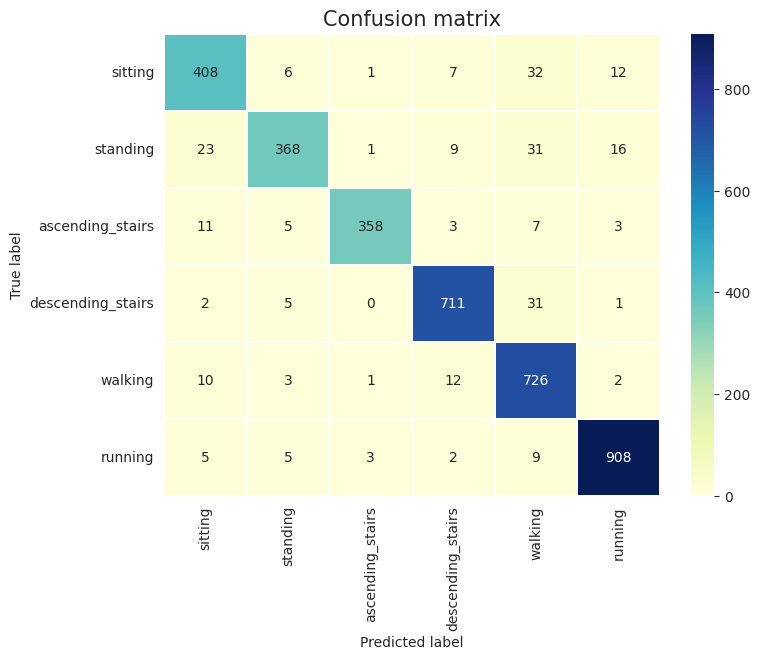

In [ ]:
# KNeighbors Classifier model
knc = KNeighborsClassifier(n_neighbors = 3)
knc.fit(pca_X_train, y_train)
y_pred_knc = knc.predict(pca_X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_knc))
print("f1 score: ", f1_score(y_test, y_pred_knc, average='macro'))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred_knc))
print("\n -------------Confusion matrix-------------\n")
cm_knc= confusion_matrix(y_test, y_pred_knc)
sns.heatmap(cm_knc, xticklabels=labels, yticklabels=labels, annot=True,linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
plt.title('Confusion matrix', fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

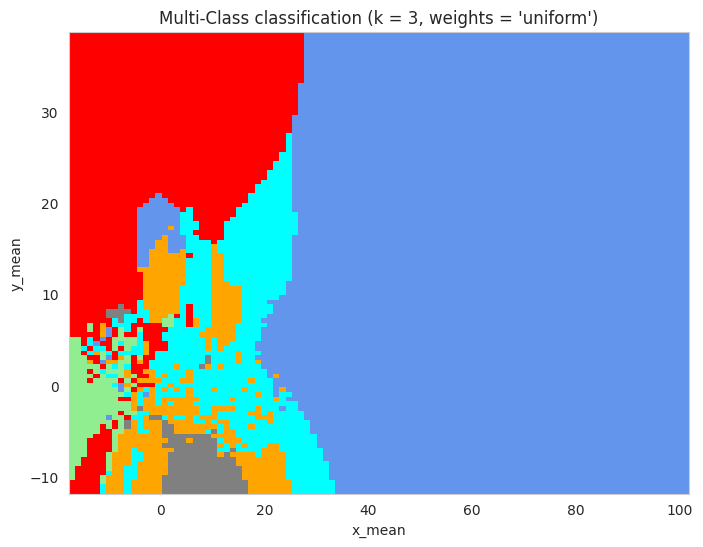

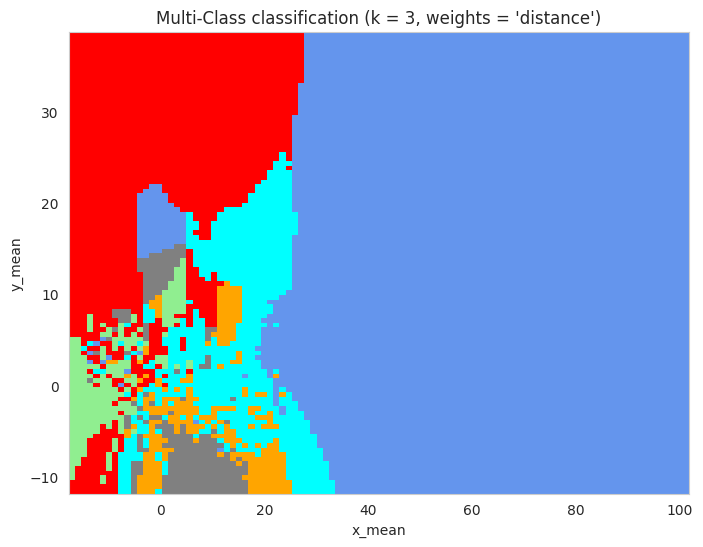

In [ ]:
n_neighbors = 3
# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue", "red", "lightgreen", "gray"])
cmap_bold = ["darkorange", "c", "darkblue", "maroon", "darkgreen", "darkgray"]

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = pca_X_train[:, :2]
y = y_train

for weights in ["uniform", "distance"]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=cmap_light,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel="x_mean",
        ylabel="y_mean",
        shading="auto",
    )

    # Plot also the training points
    # sns.scatterplot(
    #     x=X[:, 0],
    #     y=X[:, 1],
    #     hue=labels,
    #     palette=cmap_bold,
    #     alpha=1.0,
    #     edgecolor="black",
    # )
    plt.title(
        "Multi-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
    )

plt.show()

Accuracy: 0.9076799571849077
f1 score:  0.9039893516803881

 -------------Classification Report-------------

                   precision    recall  f1-score   support

 ascending_stairs       0.91      0.83      0.87       466
descending_stairs       0.97      0.79      0.87       448
          running       0.99      0.90      0.95       387
          sitting       0.89      0.93      0.91       750
         standing       0.79      0.94      0.86       754
          walking       0.98      0.96      0.97       932

         accuracy                           0.91      3737
        macro avg       0.92      0.89      0.90      3737
     weighted avg       0.92      0.91      0.91      3737


 -------------Confusion matrix-------------



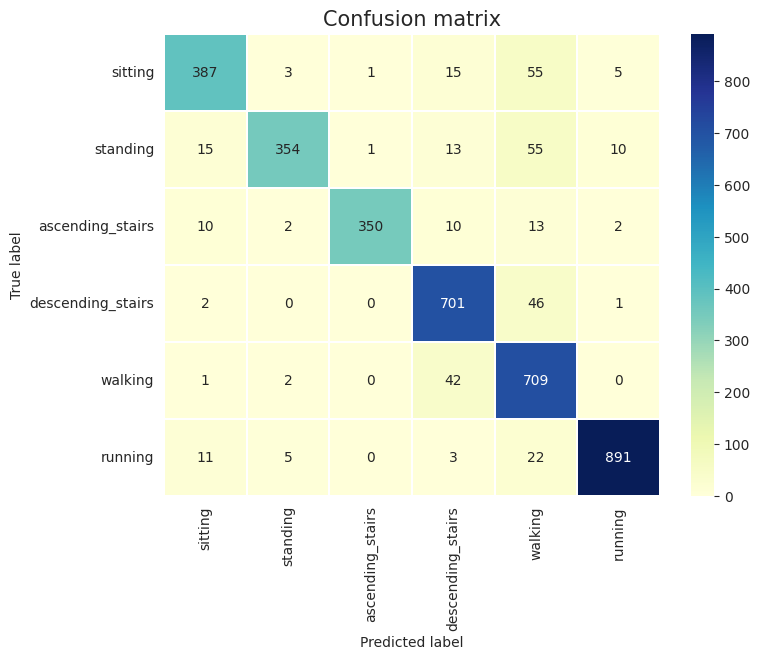

In [ ]:
# Support Vector Classifier model
svc = SVC(random_state = random_seed)
svc.fit(pca_X_train, y_train)
y_pred_svc = rfc.predict(pca_X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_svc))
print("f1 score: ", f1_score(y_test, y_pred_svc, average='macro'))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred_svc))
print("\n -------------Confusion matrix-------------\n")
cm_svc= confusion_matrix(y_test, y_pred_svc)
sns.heatmap(cm_svc, xticklabels=labels, yticklabels=labels, annot=True,linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
plt.title('Confusion matrix', fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
models = {}

# Logistic Regression
#from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression(random_state = random_seed)

# Support Vector Machines
#from sklearn.svm import SVC
models['Support Vector Machines'] = SVC(random_state = random_seed)

# Decision Trees
#from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier(random_state = random_seed)

# Random Forest
#from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier(random_state = random_seed)

# Naive Bayes
#from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
#from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier(n_neighbors=3)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy, precision, recall, f1score = {}, {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(pca_X_train, y_train)
    
    # Make predictions
    predictions = models[key].predict(pca_X_test)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test, average='macro')
    recall[key] = recall_score(predictions, y_test, average='macro')
    f1score[key] = f1_score(predictions, y_test, average='macro')

In [ ]:
import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall', 'F1-score'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model['F1-score'] = f1score.values()
df_model = df_model.sort_values(by = ['F1-score'], ascending = False)
df_model

,Accuracy,Precision,Recall,F1-score
K-Nearest Neighbor,0.930961,0.917857,0.933192,0.924302
Support Vector Machines,0.911961,0.897815,0.927900,0.909569
Random Forest,0.907680,0.892673,0.922015,0.903989
Logistic Regression,0.893497,0.880723,0.903858,0.889890
Decision Trees,0.842387,0.833588,0.838390,0.835856
Naive Bayes,0.794488,0.782269,0.783244,0.778794


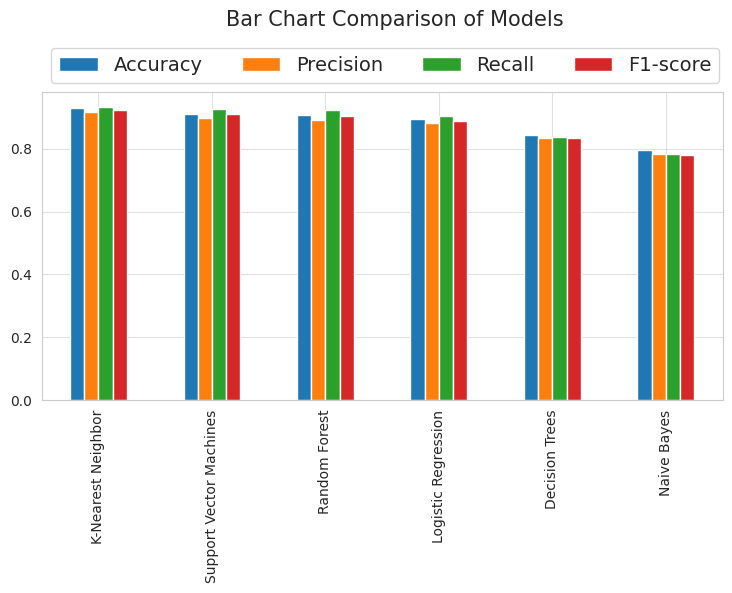

In [ ]:
ax = df_model.plot(kind = 'bar')
ax.legend(
    ncol=len(models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 14}
)
plt.grid(alpha = 0.6)
plt.suptitle("Bar Chart Comparison of Models",fontsize=15)
plt.tight_layout()
# plt.savefig('/content/drive/MyDrive/Colab Notebooks/HAR/comparison_models_pamap2.jpg', bbox_inches='tight')

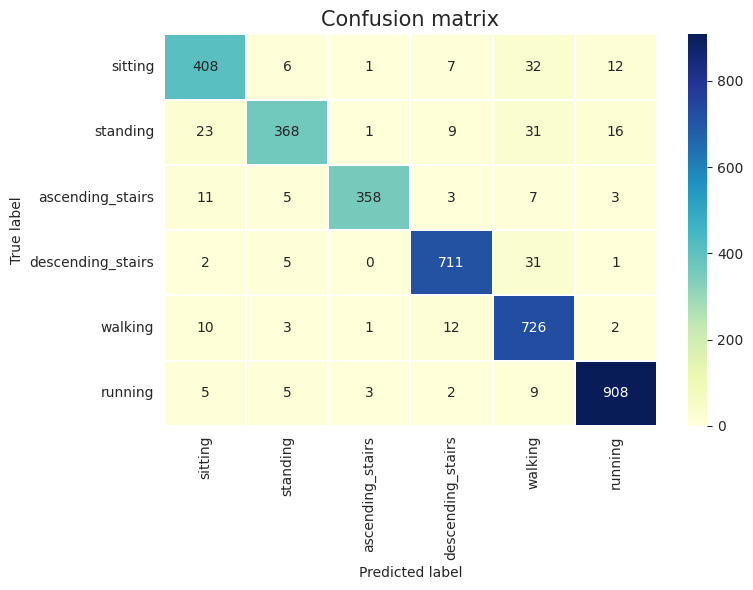

In [ ]:
# sns.heatmap(cm_knc, xticklabels=labels, yticklabels=labels, annot=True,linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
# plt.title('Confusion matrix', fontsize = 15)
# plt.ylabel('True label')
# plt.xlabel('Predicted label')
# plt.tight_layout()
# plt.savefig('/content/drive/MyDrive/Colab Notebooks/HAR/confusionMatrix_knn_pamap2.jpg', bbox_inches='tight')